# 1. Importing libraries

In [1]:
#import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#supress warnings
import warnings
warnings.filterwarnings("ignore")

# Sklearn libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm


# 2. Data inspection and understanding

In [2]:
#Reading the dataset

df = pd.read_csv("Leads.csv")

In [3]:
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [4]:
#Checking the shape of dataset
df.shape

(9240, 37)

In [5]:
df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [6]:
# checking number of unique values in each column
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [7]:
# Check data types of columns and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
#check missing values in each column

df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
#Check for duplicate
df.duplicated().sum()

0

# 3. Data cleaning

### 3.1.Handling the 'select' values


As outlined in the Problem Statement, several categorical variables contain a category labeled 'Select' that requires attention as it is equivalent to a null value. One possible explanation is that customers may not have chosen any option from the list, resulting in the data defaulting to 'Select' for those columns.

In [10]:
# List of columns having 'Select' as value

cols_select = [col for col in df.columns if len(df[col].isin(['Select']).unique())>1]
print(cols_select)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [11]:
#Convert 'select' to NaN
df = df.replace('Select', np.nan)

In [12]:
#Check if the 'select' values have been handled
cols_select = [col for col in df.columns if len(df[col].isin(['Select']).unique())>1]
print(cols_select)

[]


So there is no 'Select' value in df

### 3.2. Handling missing values

In [13]:
#Handling missing values
#Calculate the missing value percentage
100*(df.isna().mean()).sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [14]:
#Dropping columns with more than 40% null values


def dropNullCol(data ,percentage):
    
    missing_percentage = 100*(data.isna().mean()).sort_values(ascending=False)
    col_to_drop = missing_percentage[missing_percentage>=percentage].index.to_list()
    data.drop(labels=col_to_drop,axis=1, inplace=True)
    


In [15]:
dropNullCol(df,40)

In [16]:
#Check the data shape after dropping
df.shape

(9240, 30)

In [17]:
# Checking the percentage of null values for remaining columns

100*(df.isna().mean()).sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

In [18]:
# Select the columns with non-numeric data type
categorical_cols = df.select_dtypes(include=['category', 'object']).columns.tolist()

# Print the selected columns
print(categorical_cols)

['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


Check the count of values in each categorical column and then decide how to treat the missing values for that column

In [19]:
columnsList= ["City","Specialization","Tags",'What matters most to you in choosing a course',
              'What is your current occupation','Country','Last Activity','Lead Source']

for i in columnsList:
        perc=100*df[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(perc,"\n")
        print("___"*40,"\n")


value_counts % for : City 

City
Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: proportion, dtype: float64 

________________________________________________________________________________________________________________________ 

value_counts % for : Specialization 

Specialization
Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.

- City: The City column contains 39.71% missing values. Imputing these missing values with 'Mumbai' would introduce further skewness to the data, potentially leading to bias in the model. Therefore, it is advisable to drop the City column.

- Specialization: With 36.58% missing values, the Specialization column displays an even distribution among the selected specializations. Imputation or dropping is not a suitable choice. Instead, a new category labeled 'Others' should be created.

- Tags: Tags exhibits 36.29% missing values, but since tags indicate the current status of the lead, this column may not be valuable for modeling. Consequently, it is recommended to drop the Tags column.

- What matters most to you in choosing a course: This variable has 29.32% missing values, and a vast majority (99.95%) of customers have selected 'better career prospects.' This significant skewness does not provide meaningful insights, suggesting the column's omission.

- What is your current occupation: Missing values in this column can be imputed with 'Unemployed' since it has the highest occurrence. Given the business context, where X Education sells online courses, individuals without employment may enroll to enhance their job prospects.

- Country: Approximately 96% of X Education's customers are from India. Therefore, imputing missing values with 'India' does not align with current business objectives. Consequently, the Country column can be dropped.

- Last Activity: The column 'Last Activity' has just 1.11% missing values, with "Email Opened" being the most frequent activity. Imputing the missing values with the label 'Email Opened' is a suitable approach.

- Lead Source: "Google" is the most prevalent lead source, accounting for the highest number of occurrences. Given that the overall percentage of missing values in this column is only 0.39%, it is reasonable to impute the missing values with the label 'Google.'

In [20]:
#Dropping columns
df.drop(['City','Tags','Country','What matters most to you in choosing a course'],axis=1,inplace=True)

#Checking the shape after dropping
df.shape

(9240, 26)

In [21]:
#Imputing values for some columns
missing_values={'Specialization':'Others','Lead Source':'Google','Last Activity':'Email Opened',
               'What is your current occupation':'Unemployed'}
df=df.fillna(value=missing_values)

In [22]:
# Re-checking the percentage of null values for remaining columns

round(((df.isnull().sum()/df.shape[0])*100),2).sort_values(ascending=False)

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Prospect ID                                 0.00
Magazine                                    0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
X Education Forums                          0.00
Newspaper Article                           0.00
Search                                      0.00
Lead Number                                 0.00
What is your current occupation             0.00
Specialization                              0.00
Last Activity                               0.00
Total Time Spent on Website                 0.00
Converted           

In [23]:
#Check the 'TotalVisits' column
df.TotalVisits.value_counts().head(10)

TotalVisits
0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: count, dtype: int64

In [24]:
#imputing missing values with mode
df['TotalVisits'].fillna(df['TotalVisits'].mode()[0], inplace=True)
df.TotalVisits.value_counts().head(10)

TotalVisits
0.0    2326
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: count, dtype: int64

In [25]:
#Check the 'Page Views Per Visit' column
df['Page Views Per Visit'].value_counts().head(10)

Page Views Per Visit
0.0    2189
2.0    1795
3.0    1196
4.0     896
1.0     651
5.0     517
1.5     306
6.0     244
2.5     241
7.0     133
Name: count, dtype: int64

In [26]:
# Page Views Per Visit missing values to be imputed with mode

df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].mode()[0], inplace=True)
df['Page Views Per Visit'].value_counts().head(10)

Page Views Per Visit
0.0    2326
2.0    1795
3.0    1196
4.0     896
1.0     651
5.0     517
1.5     306
6.0     244
2.5     241
7.0     133
Name: count, dtype: int64

In [27]:
# Re-checking the percentage of null values after handling categorical and numerical columns

round(((df.isnull().sum()/df.shape[0])*100),2).sort_values(ascending=False)

Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                               

### 3.3. Dropping unwanted columns

In [28]:
#check for columns with one unique value, count and freq is same

df.describe(include = 'object')

Prospect ID              Lead Origin  \
count                                   9240                     9240   
unique                                  9240                        5   
top     7927b2df-8bba-4d29-b9a2-b6e0beafe620  Landing Page Submission   
freq                                       1                     4886   

       Lead Source Do Not Email Do Not Call Last Activity Specialization  \
count         9240         9240        9240          9240           9240   
unique          21            2           2            17             19   
top         Google           No          No  Email Opened         Others   
freq          2904         8506        9238          3540           3380   

       What is your current occupation Search Magazine  ...  \
count                             9240   9240     9240  ...   
unique                               6      2        1  ...   
top                         Unemployed     No       No  ...   
freq                              8290   9226     9240  ...   

       X Education Forums Newspaper Digital Advertisement  \
count                9240      9240                  9240   
unique                  2         2                     2   
top                    No        No                    No   
freq                 9239      9239                  9236   

       Through Recommendations Receive More Updates About Our Courses  \
count                     9240                                   9240   
unique                       2                                      1   
top                         No                                     No   
freq                      9233                                   9240   

       Update me on Supply Chain Content Get updates on DM Content  \
count                               9240                      9240   
unique                                 1                         1   
top                                   No                        No   
freq                                9240                      9240   

       I agree to pay the amount through cheque  \
count                                      9240   
unique                                        1   
top                                          No   
freq                                       9240   

       A free copy of Mastering The Interview Last Notable Activity  
count                                    9240                  9240  
unique                                      2                    16  
top                                        No              Modified  
freq                                     6352                  3407  

[4 rows x 21 columns]

Since these columns below just have 1 unique value, they can be dropped:
- 'I agree to pay the amount through cheque', 
- 'Get updates on DM Content', 
- 'Update me on Supply Chain Content', 
- 'Receive More Updates About Our Courses', 
- 'Magazine'


In [29]:
#drop these columns
cols_drop = ['Magazine','Receive More Updates About Our Courses',
                    'Update me on Supply Chain Content',
                    'Get updates on DM Content',
                    'I agree to pay the amount through cheque']
df.drop(cols_drop, axis = 1, inplace = True)

#Check data shape after dropping
df.shape


(9240, 21)

These below columns do not bring any value for building models so we will drop them:
- 'Prospect ID',
- 'Lead Number',
- 'Last Notable Activity' 
 

In [30]:
# Dropping Columns
df.drop(['Prospect ID','Lead Number','Last Notable Activity'],axis=1,inplace=True)

df.shape

(9240, 18)

In [31]:
# Re-checking the percentage of null values
100*(df.isna().mean(axis=1)).sort_values(ascending=False).head(10)

0       0.0
6064    0.0
6156    0.0
6157    0.0
6158    0.0
6159    0.0
6160    0.0
6161    0.0
6162    0.0
6163    0.0
dtype: float64

### 3.4. Dropping Skewed columns

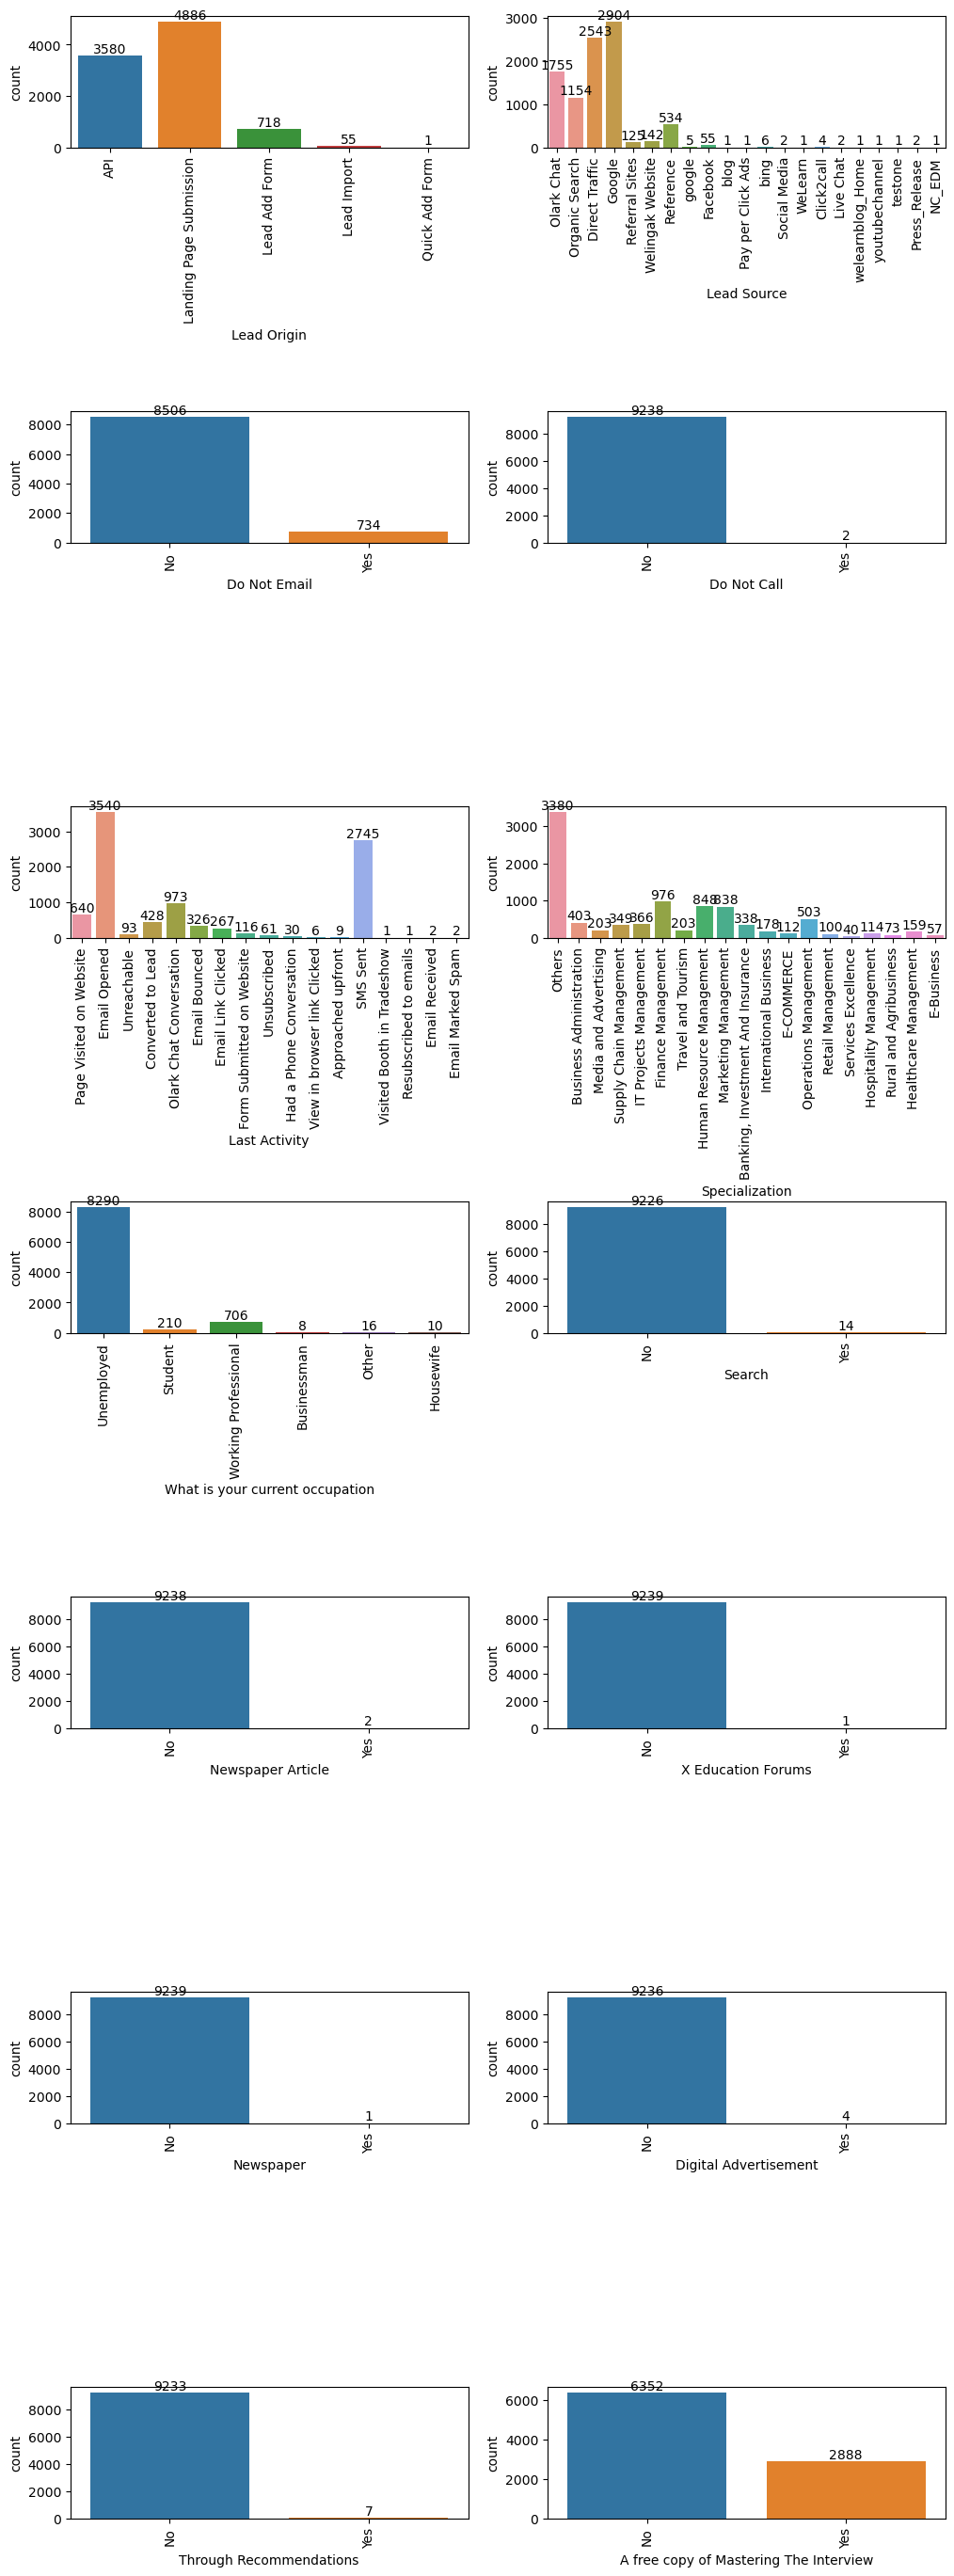

In [32]:
# plotting countplot for object dtype and histogram for number 
cat_col = df.select_dtypes(include=['category', 'object']).columns.tolist()
plt.figure(figsize=(12,40))

plt.subplots_adjust(wspace=.2,hspace=2)
for i in enumerate(cat_col):
    plt.subplot(8,2, i[0]+1)
    ax=sns.countplot(x=i[1],data=df) 
    plt.xticks(rotation=90)
    
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


plt.show()

Due to their high skewness, these columns will be dropped as they are not expected to contribute meaningful value to the model:
- Do Not Call'
- 'Search'
- 'Newspaper Article'
- 'X Education Forums'
- 'Newspaper'
- 'Digital Advertisement'
- 'Through Recommendations'

In [33]:
# Dropping categorical columns with highly skewed data

df.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],axis=1,inplace=True)
df.shape

(9240, 11)

In [34]:
df.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation A free copy of Mastering The Interview  
0                      Unemployed                                     No  
1                      Unemployed                                     No  
2                         Student                                    Yes  
3                      Unemployed                                     No  
4                      Unemployed                                     No

### 3.5. Outliers Check

In [35]:
def Outliers_Check(data,columns):

    plt.figure(figsize=[22,11])
    plt.subplots_adjust(wspace=0.4,hspace=0.5)

    for i,j in enumerate(columns):
        plt.subplot(2,2,i+1)

        sns.boxplot(y=data[j])  
        plt.ylabel(None)
        plt.title(j,fontsize=15,color='brown')

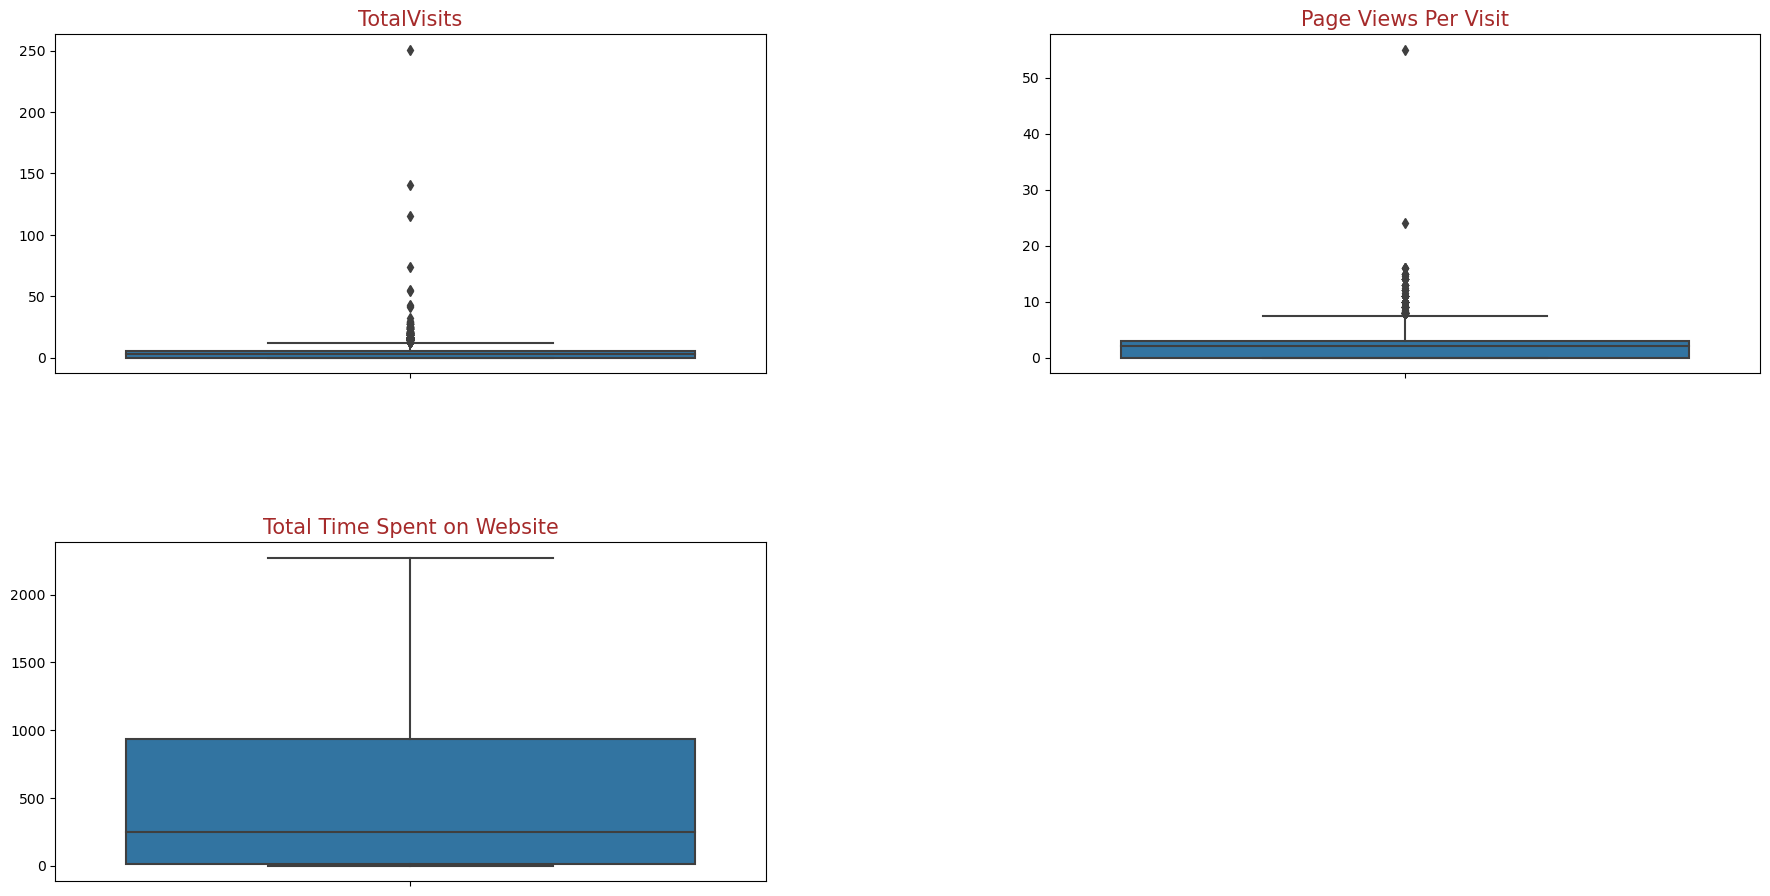

In [36]:
# Checking outliers for numerical variables other than target variable 
numeric_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

Outliers_Check(df,numeric_cols)

It can be seen that 'TotalVisits' and 'Page Views Per Visit' have outliers that need to be handled

In [37]:
df.describe(percentiles=[.10,.25,.50,.75,.95])

Converted  TotalVisits  Total Time Spent on Website  \
count  9240.000000  9240.000000                  9240.000000   
mean      0.385390     3.394156                   487.698268   
std       0.486714     4.836682                   548.021466   
min       0.000000     0.000000                     0.000000   
10%       0.000000     0.000000                     0.000000   
25%       0.000000     0.000000                    12.000000   
50%       0.000000     3.000000                   248.000000   
75%       1.000000     5.000000                   936.000000   
95%       1.000000    10.000000                  1562.000000   
max       1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9240.000000  
mean               2.327787  
std                2.164258  
min                0.000000  
10%                0.000000  
25%                0.000000  
50%                2.000000  
75%                3.000000  
95%                6.000000  
max               55.000000

In [38]:
# Defining function to handle outliers

def Outlier_handling(df,columns):
    for i in columns:
        q1 = df[i].describe()["25%"]
        q3 = df[i].describe()["75%"]
        IQR = q3 - q1

        upper_bound = q3 + 1.5*IQR
        lower_bound = q1 - 1.5*IQR

        # capping upper_bound
        df[i] = np.where(df[i] > upper_bound, upper_bound,df[i])

        # flooring lower_bound
        df[i] = np.where(df[i] < lower_bound, lower_bound,df[i])
        

In [39]:
# Checking outliers for numerical variables other than target variable 
outliers_cols = ["TotalVisits","Page Views Per Visit"]

Outlier_handling(df,outliers_cols)

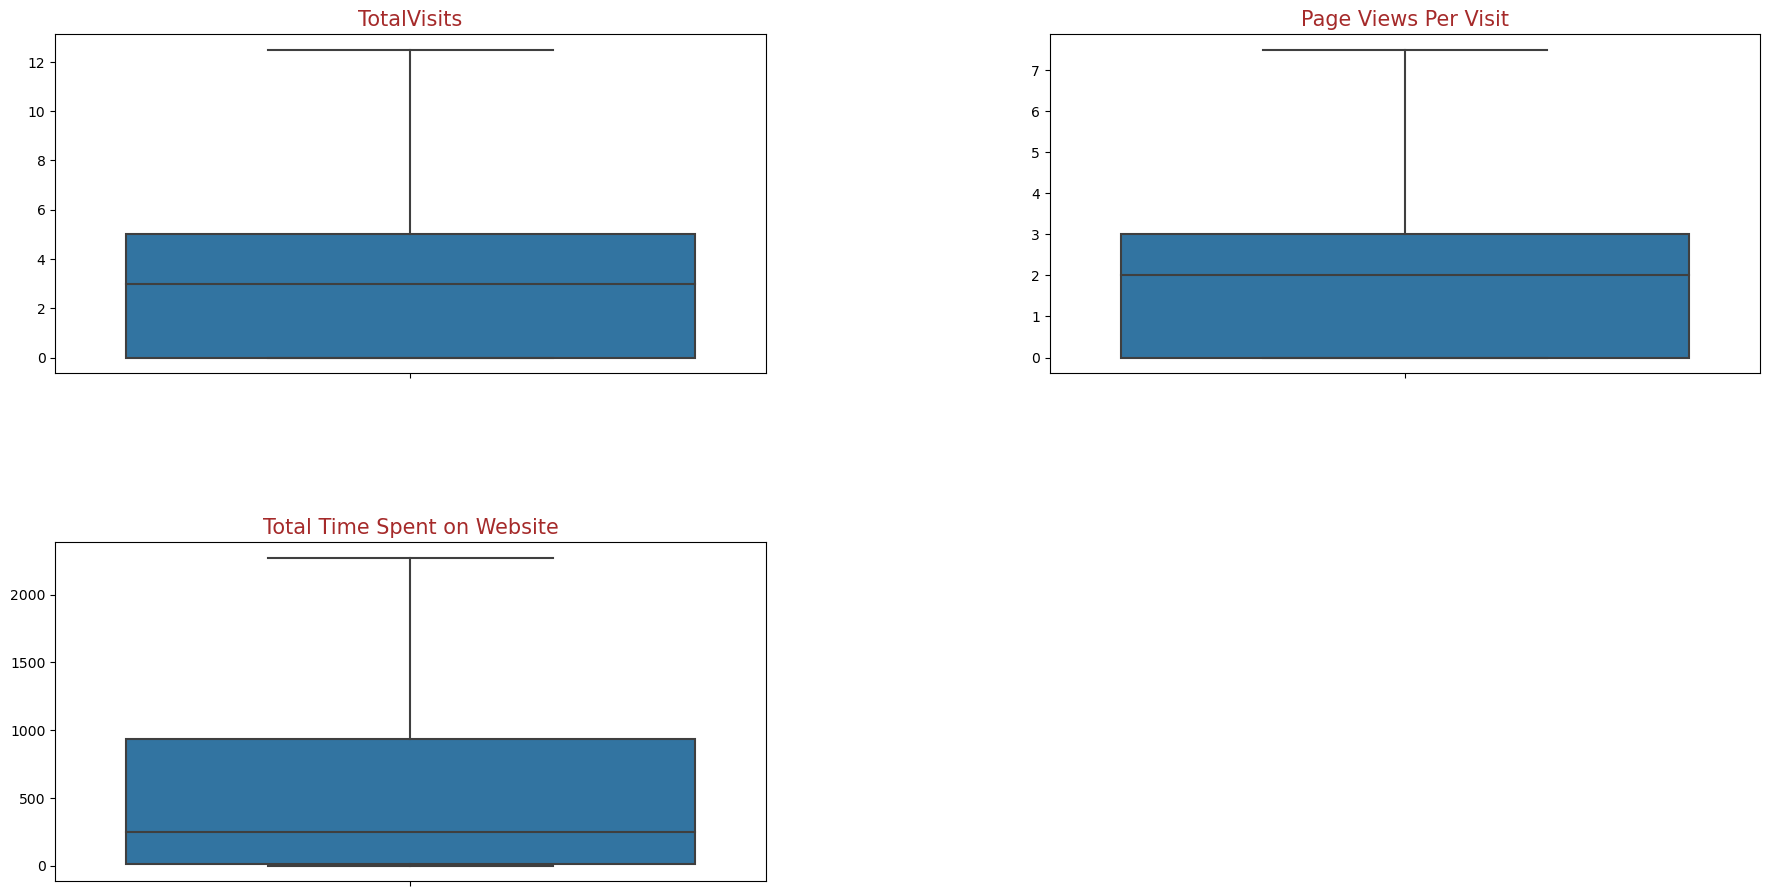

In [40]:
Outliers_Check(df,numeric_cols)

In [41]:
df.describe(percentiles=[.10,.25,.50,.75,.95])

Converted  TotalVisits  Total Time Spent on Website  \
count  9240.000000  9240.000000                  9240.000000   
mean      0.385390     3.213853                   487.698268   
std       0.486714     3.005136                   548.021466   
min       0.000000     0.000000                     0.000000   
10%       0.000000     0.000000                     0.000000   
25%       0.000000     0.000000                    12.000000   
50%       0.000000     3.000000                   248.000000   
75%       1.000000     5.000000                   936.000000   
95%       1.000000    10.000000                  1562.000000   
max       1.000000    12.500000                  2272.000000   

       Page Views Per Visit  
count           9240.000000  
mean               2.274987  
std                1.917776  
min                0.000000  
10%                0.000000  
25%                0.000000  
50%                2.000000  
75%                3.000000  
95%                6.000000  
max                7.500000

### 3.6. Standardising data

In [42]:
 df.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation A free copy of Mastering The Interview  
0                      Unemployed                                     No  
1                      Unemployed                                     No  
2                         Student                                    Yes  
3                      Unemployed                                     No  
4                      Unemployed                                     No

In [43]:
## Categorical Variables 

columns_cat = ["Lead Origin","Lead Source","Do Not Email","Last Activity","Specialization",
                  "What is your current occupation","A free copy of Mastering The Interview"]

for i in columns_cat:
        perc=100*df[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(perc,"\n")
        print("___"*40,"\n")


value_counts % for : Lead Origin 

Lead Origin
Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: proportion, dtype: float64 

________________________________________________________________________________________________________________________ 

value_counts % for : Lead Source 

Lead Source
Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLea

- We will to group infrequently occurring categories in the "Lead Score" and "Last Activity" columns under "Others" to simplify the creation of dummy variables.

- Additionally, we'll standardize the case for "Google" entries in the "Lead Source" column for consistency.

In [44]:
# Grouping low frequency value levels to Others
df['Lead Source'] = df['Lead Source'].replace(["bing","Click2call","Press_Release",
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home",
                                                           "WeLearn","blog","NC_EDM"],"Others")

# Changing google to Google
df['Lead Source'] = df['Lead Source'].replace("google","Google")

In [45]:
# value_counts percentage after replace
df["Lead Source"].value_counts(normalize=True)*100

Lead Source
Google              31.482684
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Facebook             0.595238
Others               0.248918
Name: proportion, dtype: float64

In [46]:
# value_counts percentage after replace
df['Last Activity'].value_counts(normalize=True)*100

Last Activity
Email Opened                    38.311688
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: proportion, dtype: float64

In [47]:
# Grouping low frequency value levels to Others 
df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                               'Had a Phone Conversation', 
                                                               'Approached upfront',
                                                               'View in browser link Clicked',       
                                                               'Email Marked Spam',                  
                                                               'Email Received','Visited Booth in Tradeshow',
                                                               'Resubscribed to emails'],'Others')

In [48]:
# value_counts percentage after replace
df['Last Activity'].value_counts(normalize=True)*100

Last Activity
Email Opened                 38.311688
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Email Link Clicked            2.889610
Others                        2.218615
Form Submitted on Website     1.255411
Name: proportion, dtype: float64

In [49]:
# Renaming column name "A free copy of Mastering The Interview"
df.rename(columns={'A free copy of Mastering The Interview': 'Free_copy'}, inplace=True)

# Renaming column name "What is your current occupationA free copy of Mastering The Interview"
df.rename(columns={'What is your current occupation': 'Current_occupation'}, inplace=True)

In [50]:
# Mapping binary categorical variables (Yes-No to 1-0) 
df['Do Not Email'] = df['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)

df['Free_copy'] = df['Free_copy'].apply(lambda x: 1 if x =='Yes' else 0)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Origin                  9240 non-null   object 
 1   Lead Source                  9240 non-null   object 
 2   Do Not Email                 9240 non-null   int64  
 3   Converted                    9240 non-null   int64  
 4   TotalVisits                  9240 non-null   float64
 5   Total Time Spent on Website  9240 non-null   int64  
 6   Page Views Per Visit         9240 non-null   float64
 7   Last Activity                9240 non-null   object 
 8   Specialization               9240 non-null   object 
 9   Current_occupation           9240 non-null   object 
 10  Free_copy                    9240 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 794.2+ KB


# 4. EDA

### 4.1. Check data imbalance

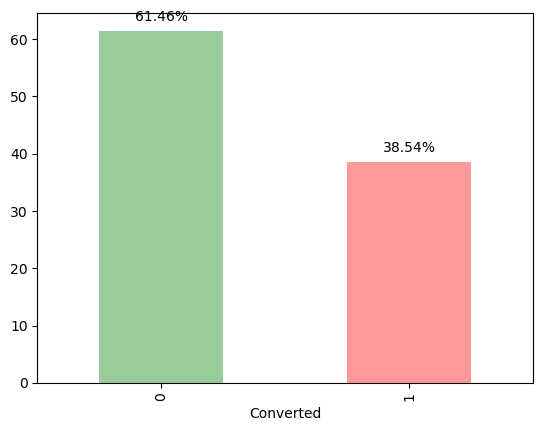

In [52]:
## ploting the results on bar plot


ax = (100 * df["Converted"].value_counts(normalize=True)).plot.bar(color=["Green", "Red"], alpha=0.4)

# Adding exact percentages on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Display the plot
plt.show()


- The conversion rate stands at 38.5%, indicating that only a minority, or 38.5% of individuals, have converted to leads.
- In contrast, the majority, comprising 61.5% of the people, did not convert to leads.

### 4.2. Univariate Analysis

In [53]:
df.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization Current_occupation  \
0  Page Visited on Website                   Others         Unemployed   
1             Email Opened                   Others         Unemployed   
2             Email Opened  Business Administration            Student   
3                   Others    Media and Advertising         Unemployed   
4        Converted to Lead                   Others         Unemployed   

   Free_copy  
0          0  
1          0  
2          1  
3          0  
4          0

In [54]:
#List of categorical columns
cate_cols = ["Lead Origin","Current_occupation","Do Not Email",
            "Free_copy","Lead Source","Last Activity","Specialization"]

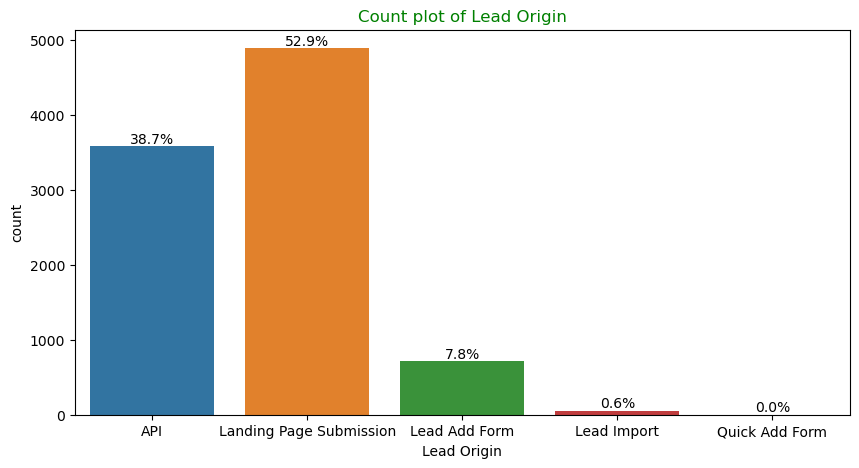

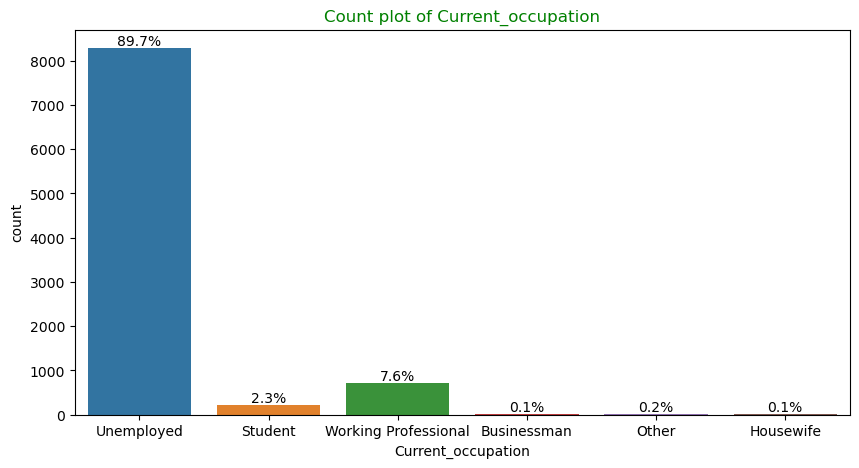

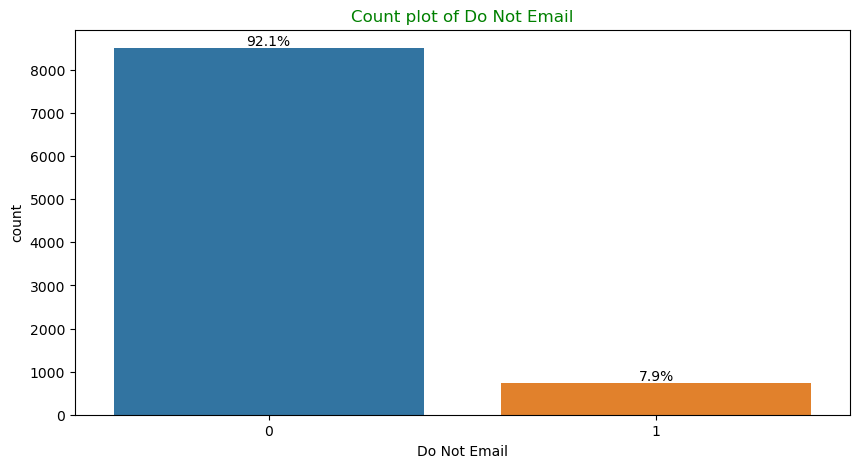

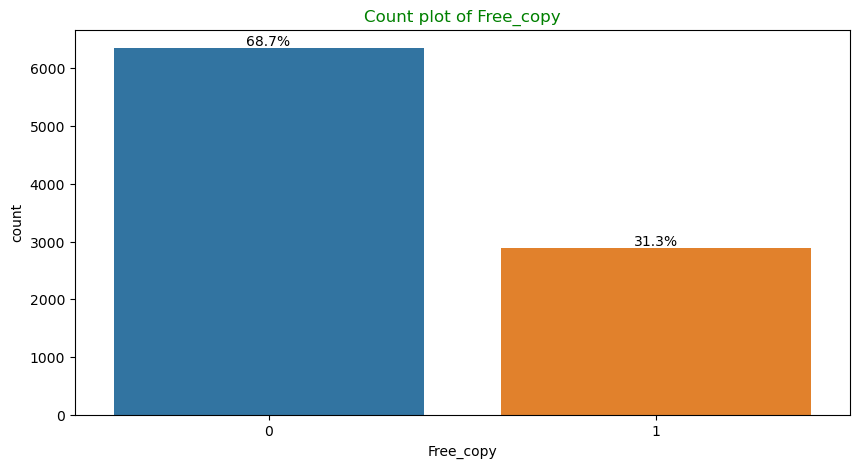

In [55]:
# countplot of columns with its value_counts percentage 
for i in cate_cols[:4]:
    
    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i),color="green")
    ax=sns.countplot(x=i,data=df)
    total=len(df[i])
    plt.xticks(rotation=0)
    
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        
        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

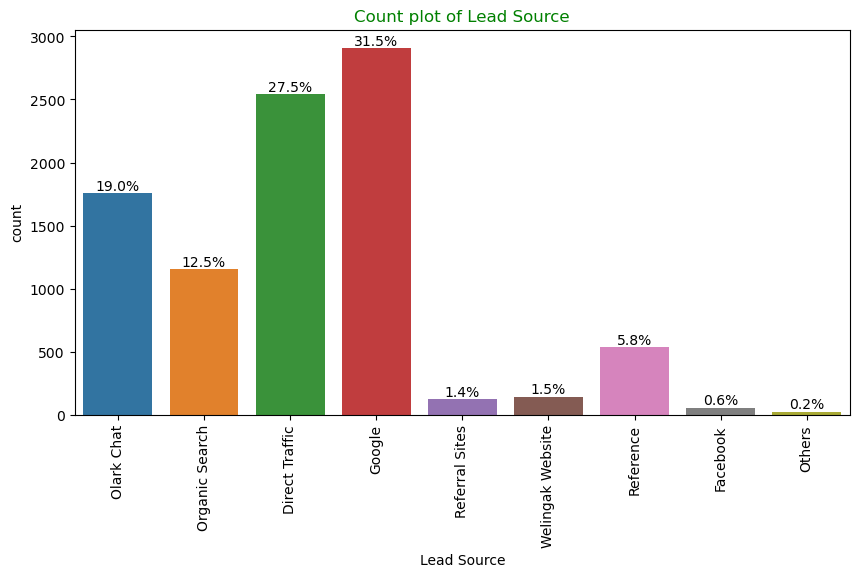

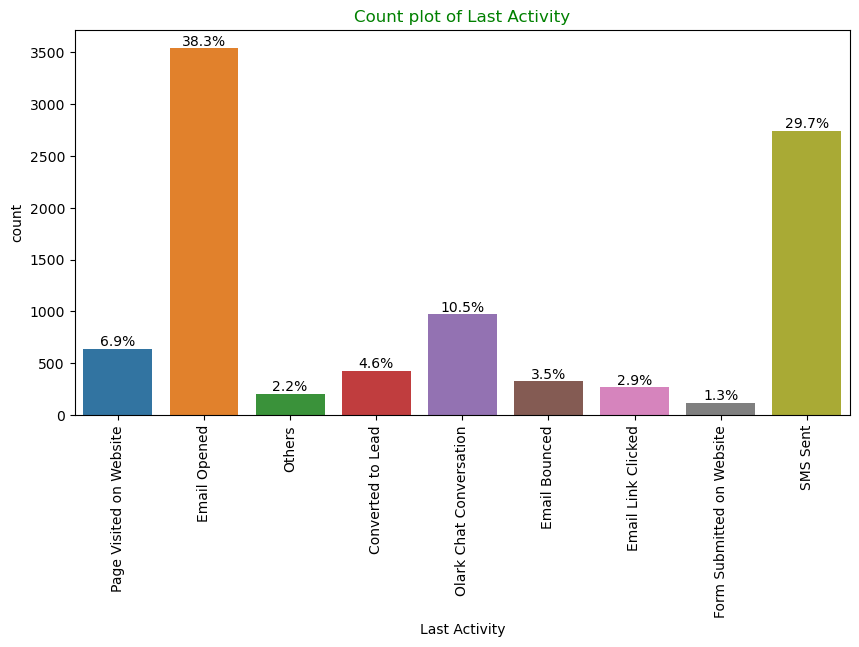

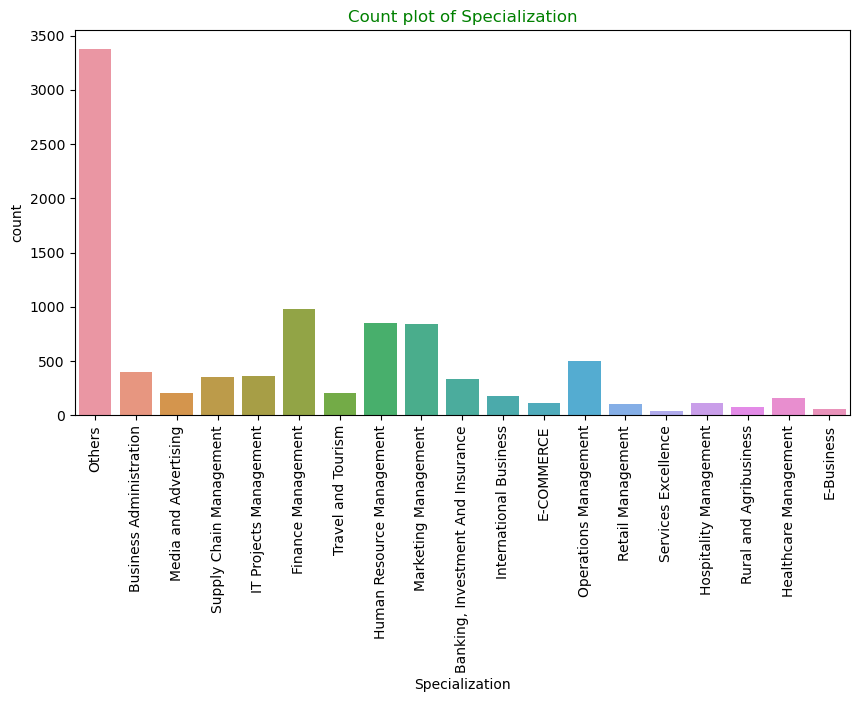

In [56]:
# Barplot for remaining columns from cat_cols 
for i in cate_cols[4:]:
    
    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i),color="green")
    ax=sns.countplot(x=i,data=df)
    total=len(df[i])
    plt.xticks(rotation=90)
    
    
    if i!="Specialization":       
        for p in ax.patches:
            text = '{:.1f}%'.format(100*p.get_height()/total)
            x = p.get_x() + p.get_width() / 2.
            y = p.get_height()

            ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    else:
        pass

- For Lead Origin, "Landing Page Submission" accounts for 53% of customers, while "API" identifies 39%.
- Regarding Current Occupation, a significant 90% of customers are marked as unemployed.
- In the "Do Not Email" category, 92% of people have chosen not to receive emails about the course.
- Lead Source is primarily from Google and Direct Traffic, contributing to 58% of leads.
- Last Activity highlights that 68% of customers are engaged in SMS Sent and Email Opened activities.

### 4.3. Bivariate Analysis of Categorical Variables

In [57]:
# Function to do Bivariate Analysis
def BiVarAnalysis(dataframe , var_name, Target="Converted"):
    plt.figure(figsize=(20,6))
    plt.suptitle("Lead Conversion Rate of {}".format(var_name),color="red",fontsize=18)
    
    ax=sns.countplot(x=var_name, hue=Target, data=dataframe, palette="mako")
    
    plt.xticks(rotation=90)
    plt.ylabel("Count",color='brown')
    plt.xlabel("{}".format(var_name))
    plt.legend(labels=["Not Converted","Converted"],title = "Lead Conversion Rate")
    
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')


In [58]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'Current_occupation', 'Free_copy'],
      dtype='object')

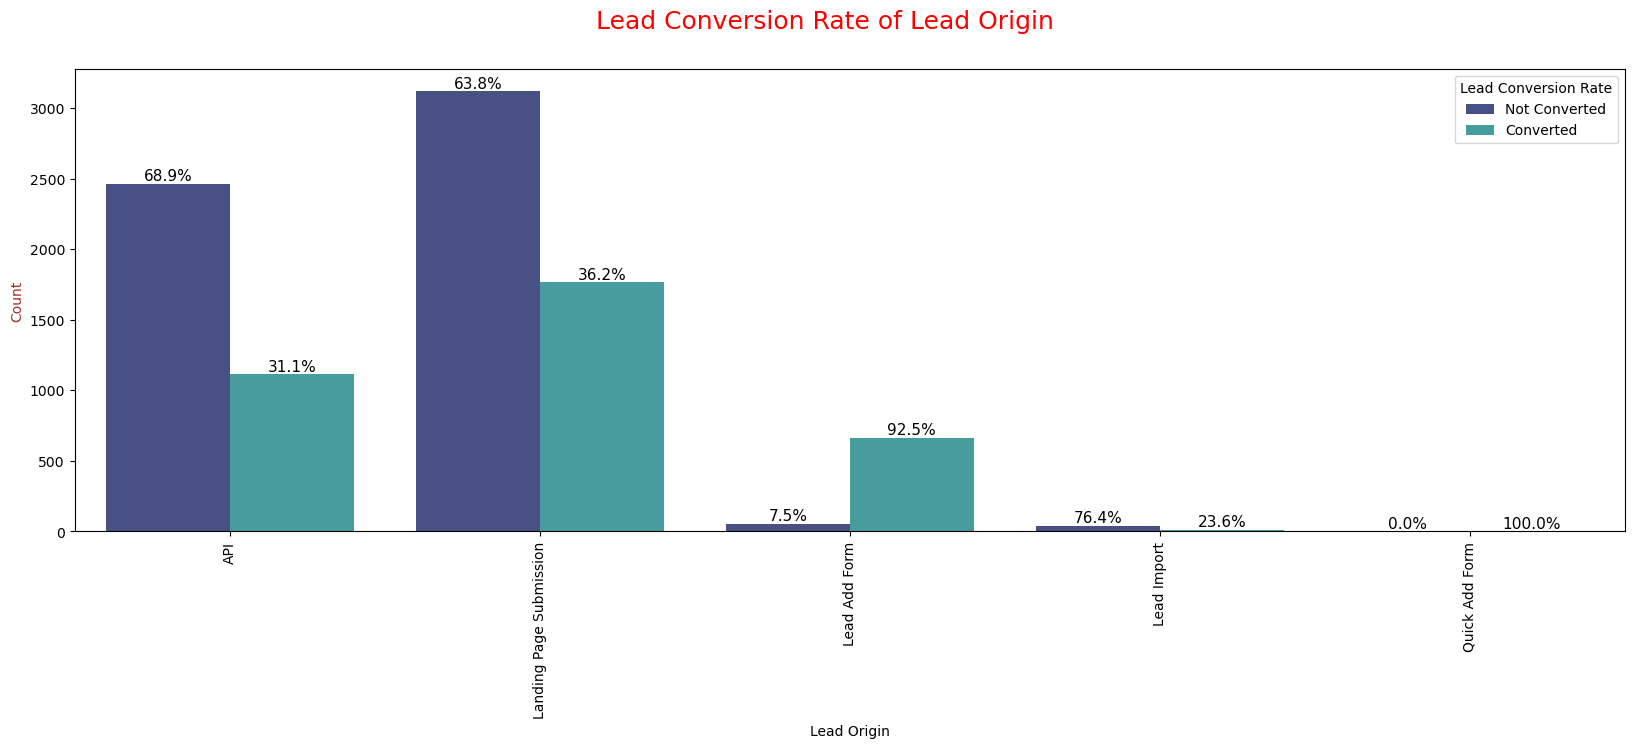

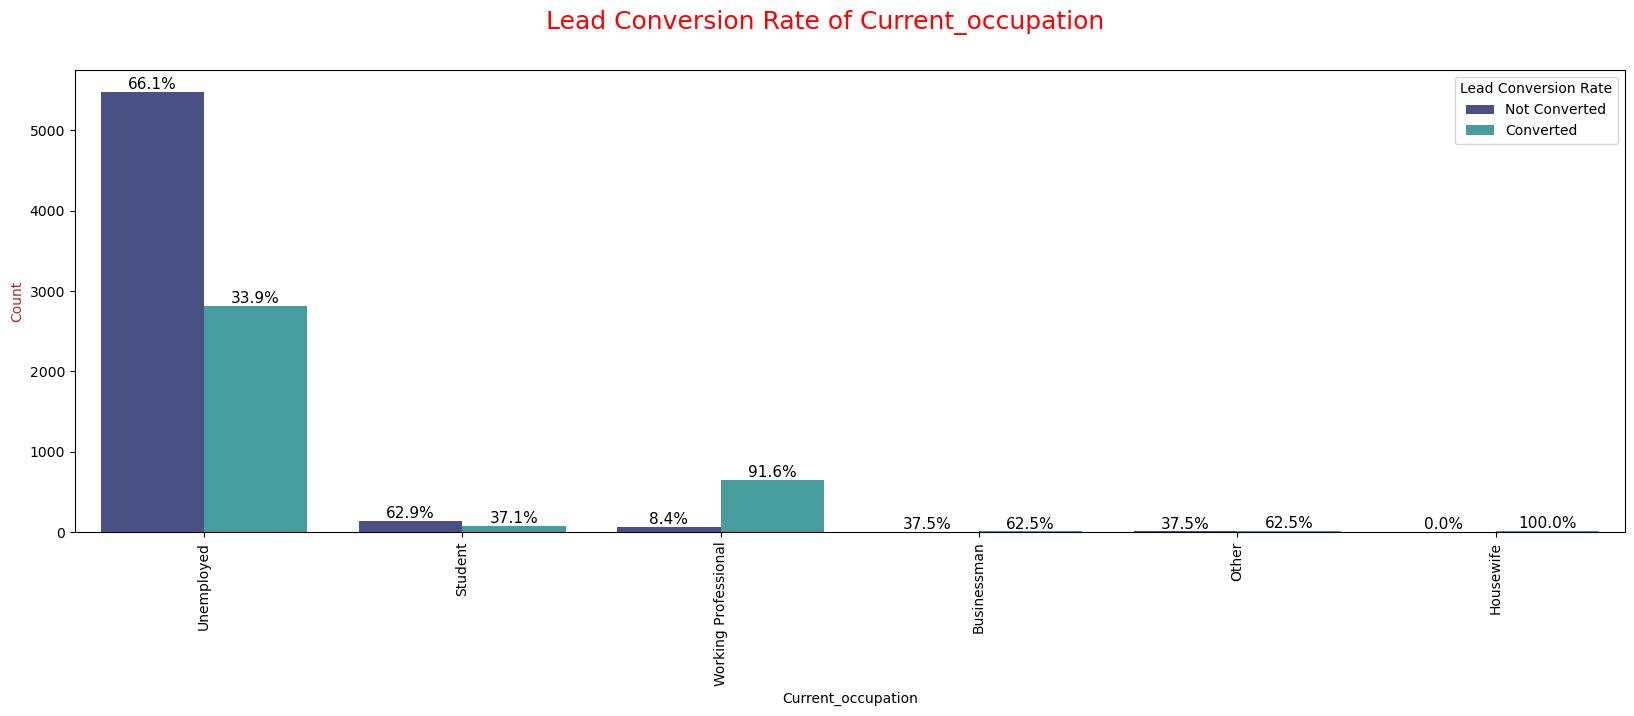

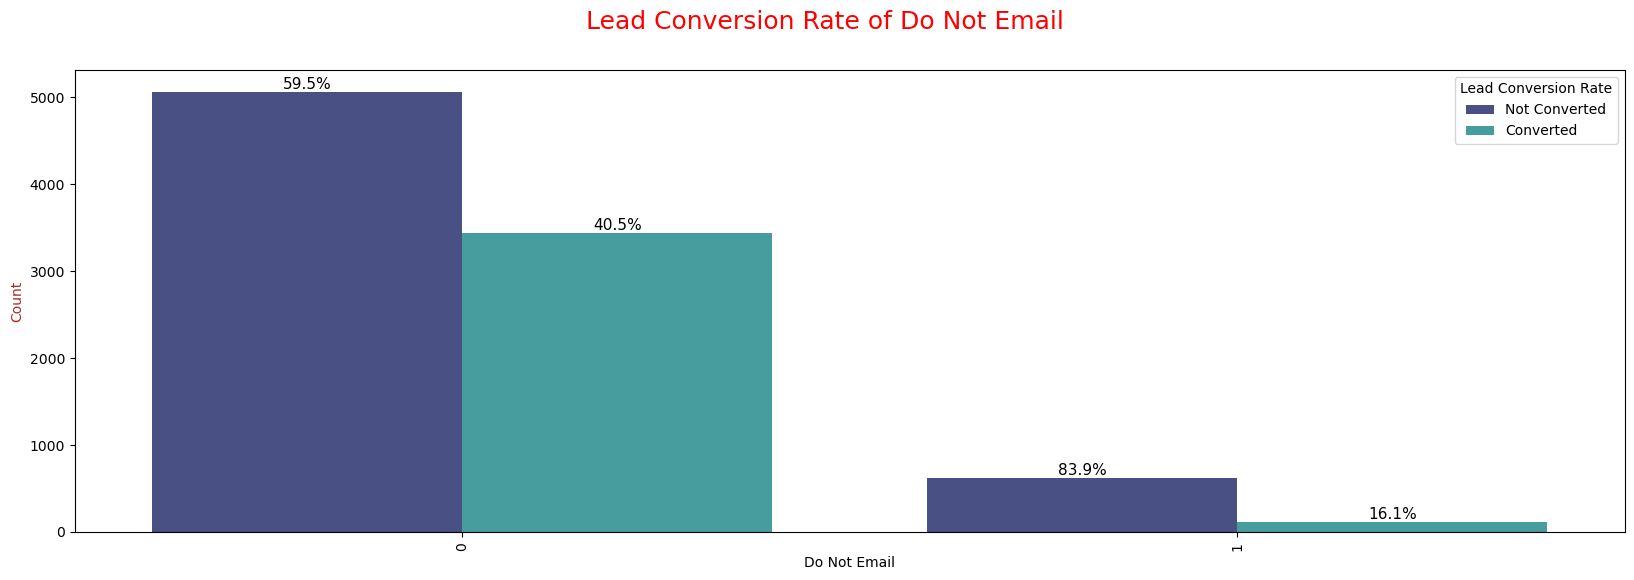

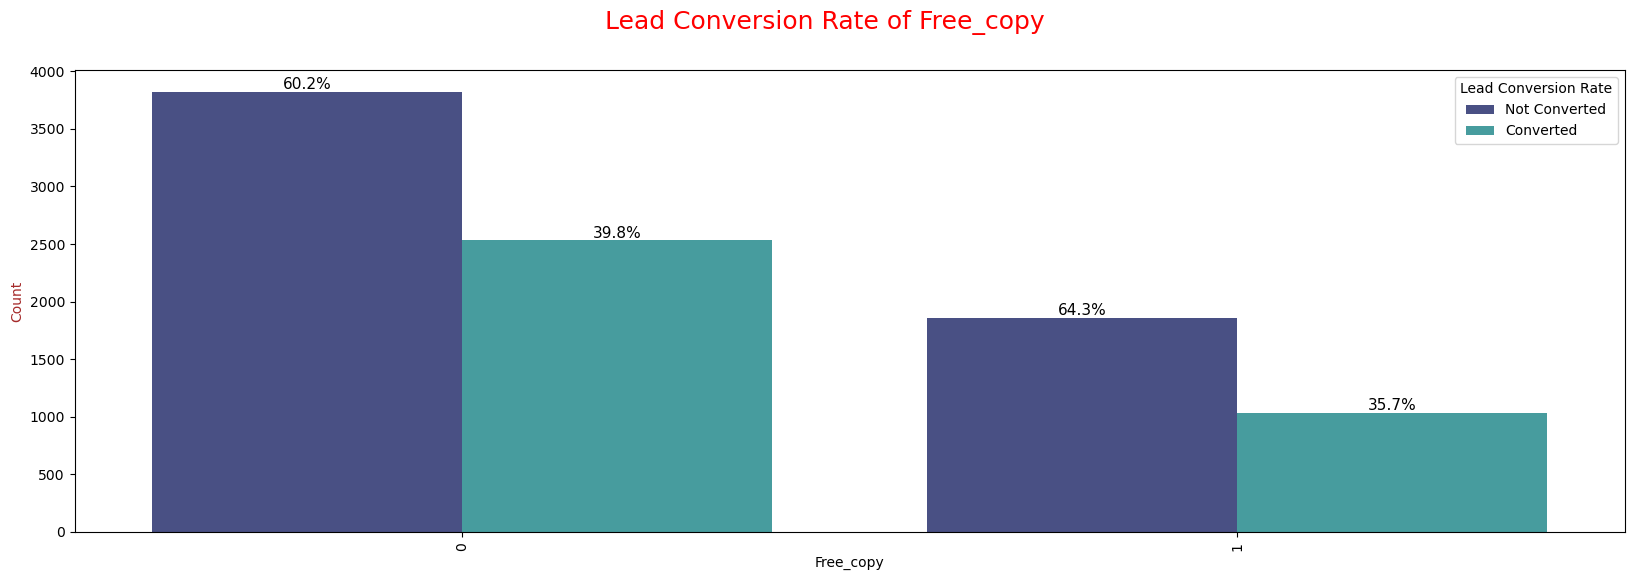

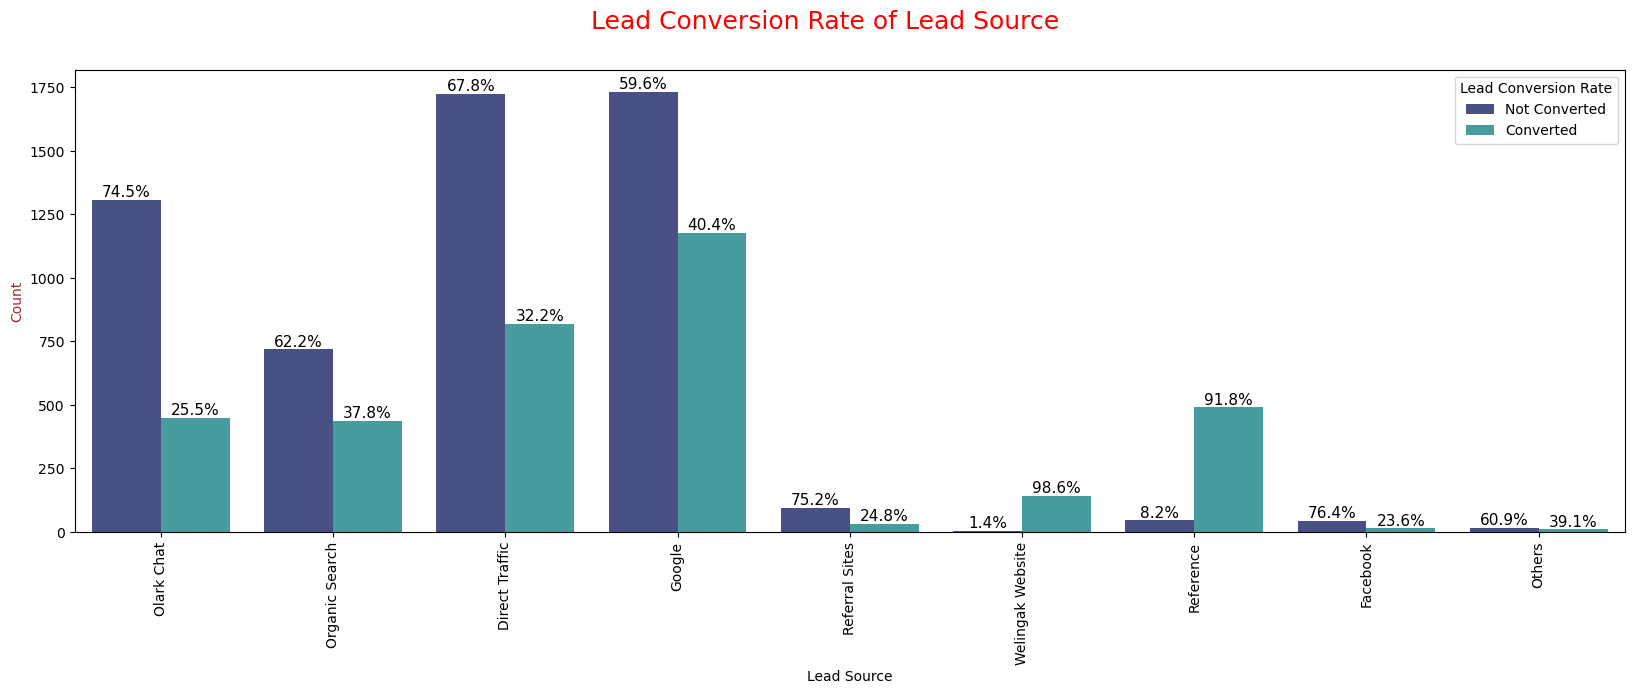

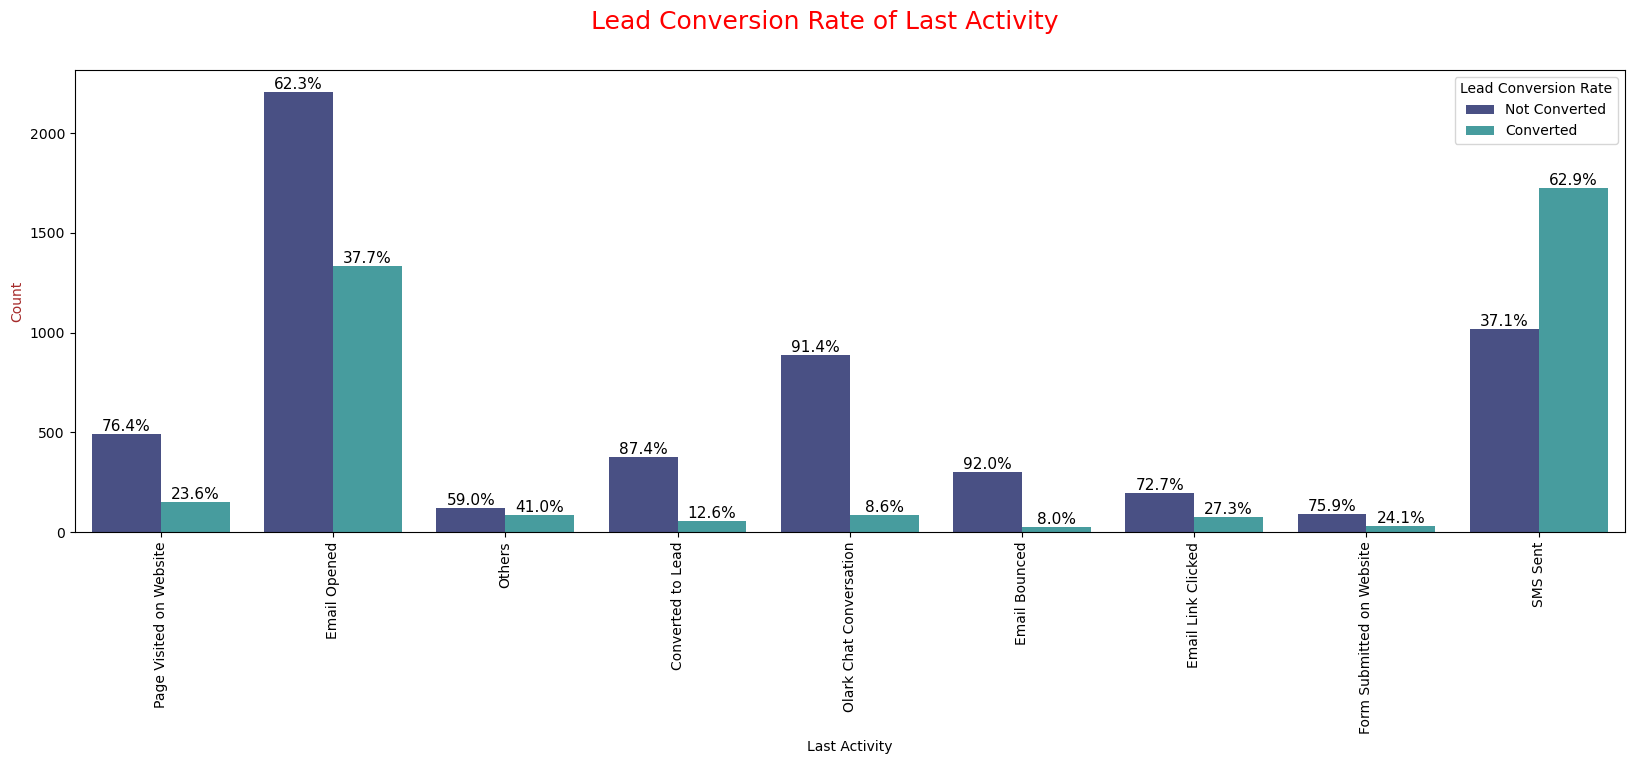

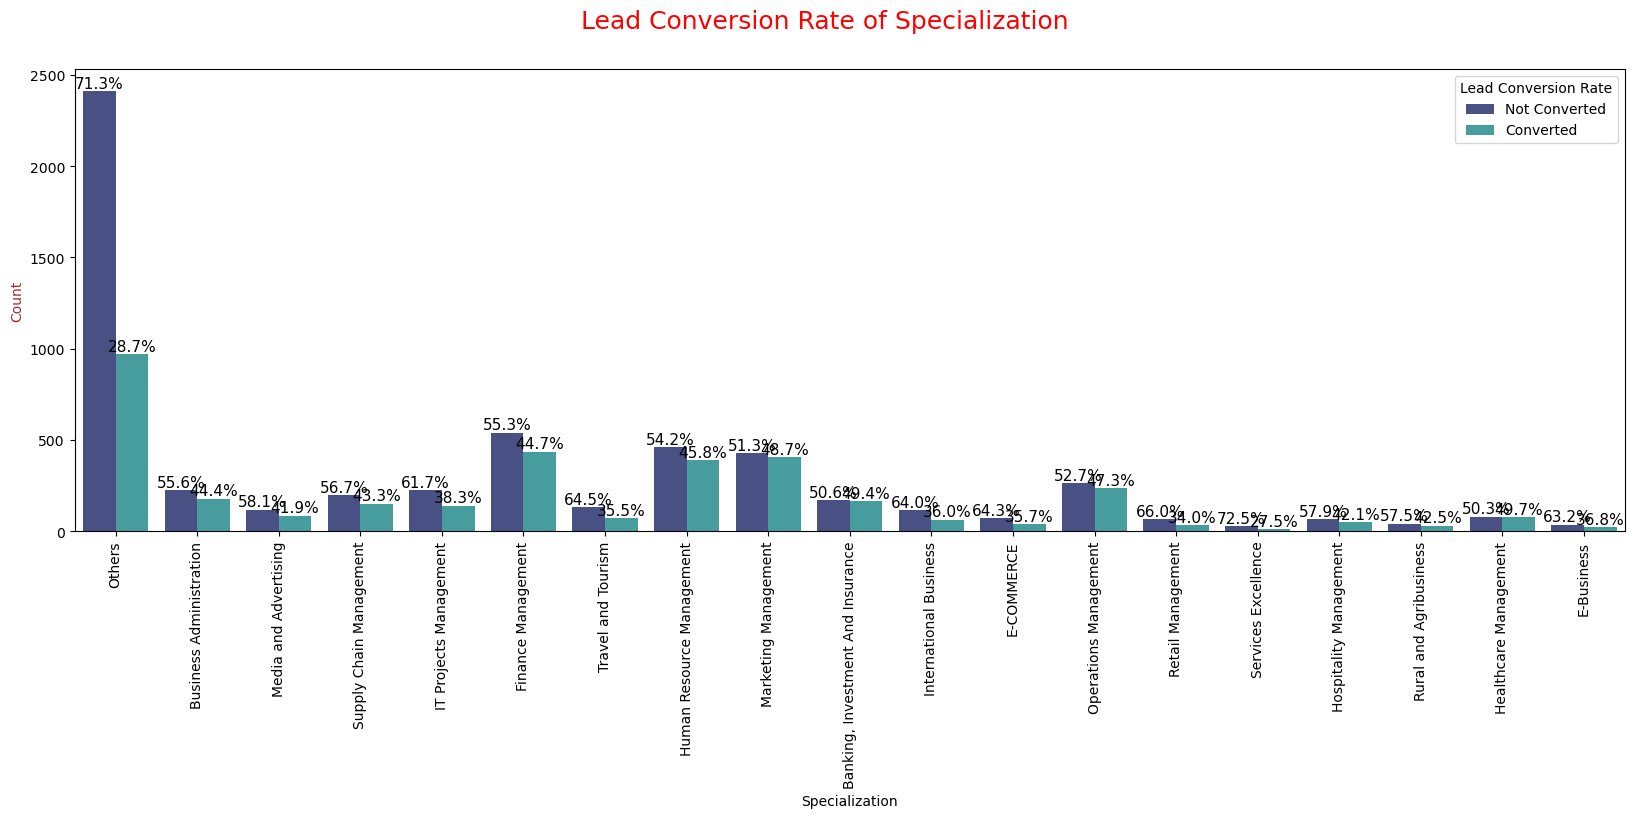

In [59]:
CatVarCols = ['Lead Origin', 'Current_occupation', 'Do Not Email',
            'Free_copy', 'Lead Source', 'Last Activity', 'Specialization']
#Calling Bivariate Analysis function
for i in CatVarCols:
    BiVarAnalysis(df,var_name=i)

- The most effective Lead Origin is 'Landing Page Submission' with a Lead Conversion Rate (LCR) of 36.2%, followed by 'API' at 31.1%.
- Working Professionals exhibit a significantly higher LCR at 91.6% compared to Unemployed individuals at 33.9% in the Current Occupation category.
- 'Google' proves to be the most effective Lead Source with an LCR of 40.4%, followed by 'Direct Traffic' at 32.2%, and 'Organic Search' at 37.8% (contributing to only 12.5% of customers). 'Reference' has the highest LCR at 91.8%, but there are only 5.8% of customers through this Lead Source.
- The most effective Last Activity types are 'SMS Sent' and 'Email Opened' with LCRs of 62.9% and 37.7% respectively.
- Specializations in 'Marketing Management', 'HR Management', 'Finance Management', and 'Operations Management' all display good LCRs, indicating strong customer interest in these specializations.

### 4.4. Bivariate Analysis of Numerical Variables

In [60]:
NumVarCols = ['Converted', 'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

<Figure size 1600x400 with 0 Axes>

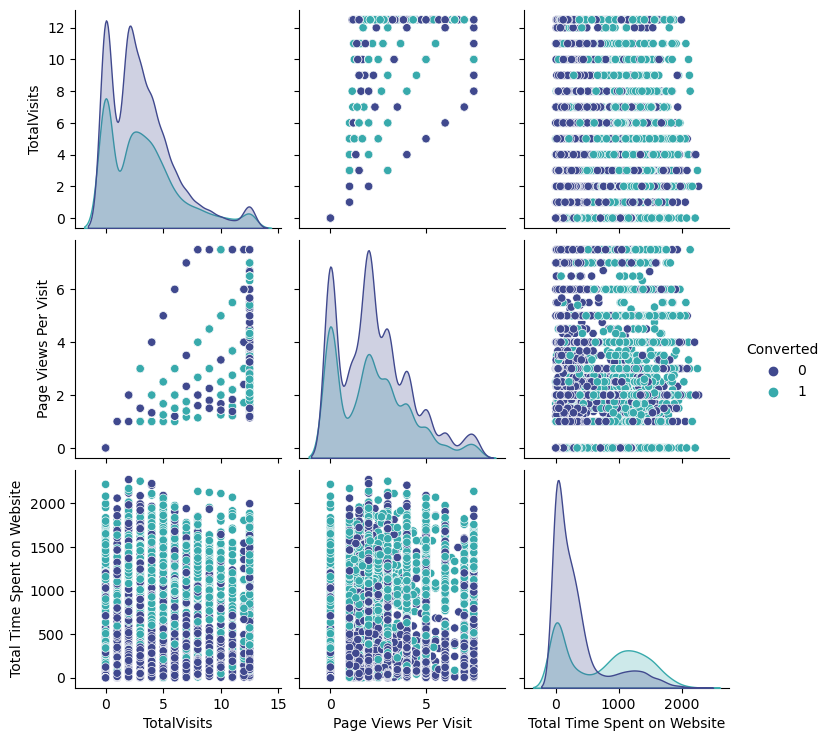

In [61]:
# Pairplot of Numerical Variables
plt.figure(figsize = (16, 4))
sns.pairplot(data=df, vars=NumVarCols[1:], hue="Converted", palette="mako")                                  
plt.show()

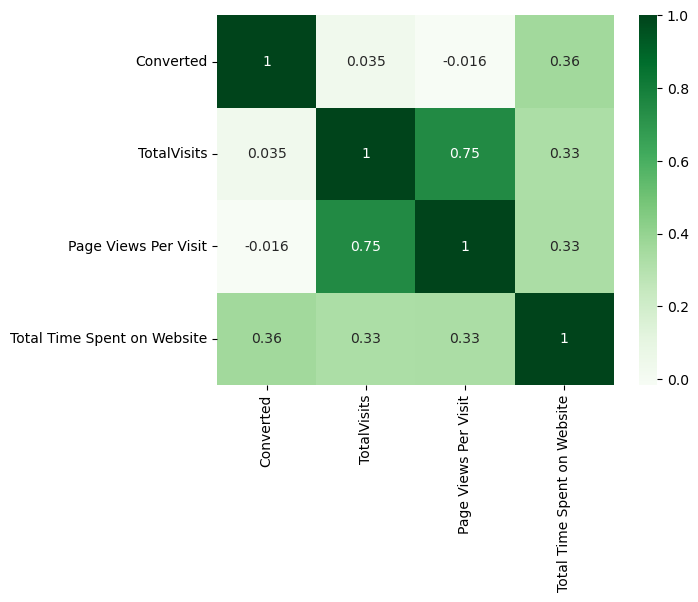

In [62]:
# Heatmap to show correlation between Numerical Variables
sns.heatmap(data=df[NumVarCols].corr(), cmap="Greens", annot=True)
plt.show()

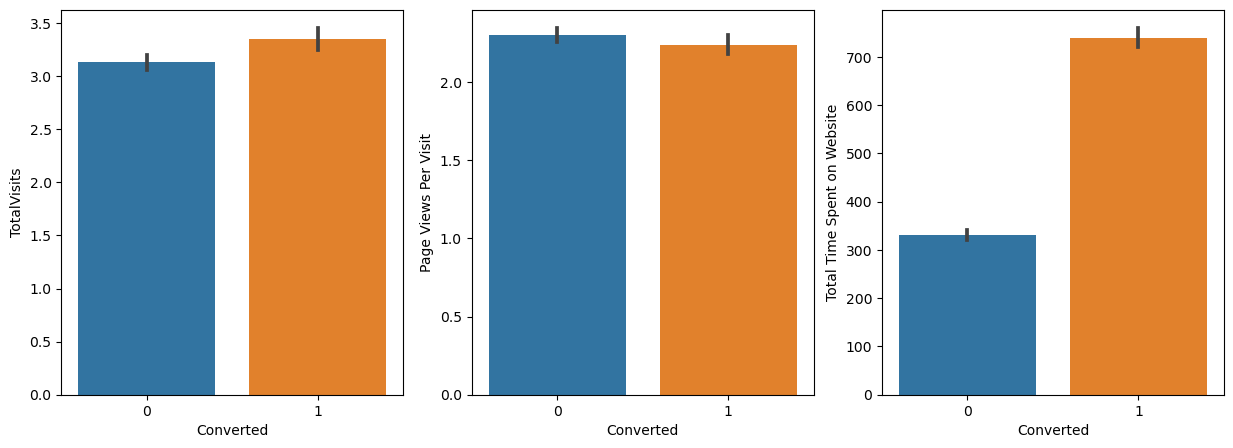

In [63]:
# Barplot with Converted as hue
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.barplot(y = 'TotalVisits', x = 'Converted', data = df)
plt.subplot(1,3,2)
sns.barplot(y = 'Page Views Per Visit', x = 'Converted', data = df)
plt.subplot(1,3,3)
sns.barplot(y = 'Total Time Spent on Website', x = 'Converted', data = df)
plt.show()


- There is a robust positive correlation between 'Total Visits' and 'Page Views per Visit,' suggesting that customers who visit the website more frequently tend to view more pages per visit. 
- Additionally, customers who spend more time on the website exhibit a higher Lead Conversion Rate (LCR), suggesting that increasing the time spent on the website can contribute to higher conversion rates.

# 5. Data preparation

### 5.1. Create dummies

In [64]:

df.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization Current_occupation  \
0  Page Visited on Website                   Others         Unemployed   
1             Email Opened                   Others         Unemployed   
2             Email Opened  Business Administration            Student   
3                   Others    Media and Advertising         Unemployed   
4        Converted to Lead                   Others         Unemployed   

   Free_copy  
0          0  
1          0  
2          1  
3          0  
4          0

In [65]:
df.shape

(9240, 11)

In [66]:
# Creating a dummy variable for 5 categorical variables and dropping the first one.
dummy = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                                 'Current_occupation']], dtype=np.uint8, drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy], axis=1)
df.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization Current_occupation  ...  \
0  Page Visited on Website                   Others         Unemployed  ...   
1             Email Opened                   Others         Unemployed  ...   
2             Email Opened  Business Administration            Student  ...   
3                   Others    Media and Advertising         Unemployed  ...   
4        Converted to Lead                   Others         Unemployed  ...   

   Specialization_Retail Management  Specialization_Rural and Agribusiness  \
0                                 0                                      0   
1                                 0                                      0   
2                                 0                                      0   
3                                 0                                      0   
4                                 0                                      0   

   Specialization_Services Excellence  Specialization_Supply Chain Management  \
0                                   0                                       0   
1                                   0                                       0   
2                                   0                                       0   
3                                   0                                       0   
4                                   0                                       0   

   Specialization_Travel and Tourism  Current_occupation_Housewife  \
0                                  0                             0   
1                                  0                             0   
2                                  0                             0   
3                                  0                             0   
4                                  0                             0   

   Current_occupation_Other  Current_occupation_Student  \
0                         0                           0   
1                         0                           0   
2                         0                           1   
3                         0                           0   
4                         0                           0   

   Current_occupation_Unemployed  Current_occupation_Working Professional  
0                              1                                        0  
1                              1                                        0  
2                              0                                        0  
3                              1                                        0  
4                              1                                        0  

[5 rows x 54 columns]

In [67]:
# Dropping original columns after creating dummy variables

columns_to_drop = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'Current_occupation']
df = df.drop(columns=columns_to_drop)


In [68]:
df.shape

(9240, 49)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 49 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              9240 non-null   int64  
 1   Converted                                 9240 non-null   int64  
 2   TotalVisits                               9240 non-null   float64
 3   Total Time Spent on Website               9240 non-null   int64  
 4   Page Views Per Visit                      9240 non-null   float64
 5   Free_copy                                 9240 non-null   int64  
 6   Lead Origin_Landing Page Submission       9240 non-null   uint8  
 7   Lead Origin_Lead Add Form                 9240 non-null   uint8  
 8   Lead Origin_Lead Import                   9240 non-null   uint8  
 9   Lead Origin_Quick Add Form                9240 non-null   uint8  
 10  Lead Source_Facebook                

### 5.2. Splitting the data into training and testing set

In [70]:
# Putting predictor variables to X
X = df.drop('Converted', axis=1)

# Putting Target variables to y
y = df['Converted']

In [71]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

print("X_train:", X_train.shape, "\ny_train:", y_train.shape)
print("X_test:", X_test.shape, "\ny_test:", y_test.shape)

X_train: (6468, 48) 
y_train: (6468,)
X_test: (2772, 48) 
y_test: (2772,)


# 6. Feature Scaling and Correlation Checking

In [72]:
scaler = StandardScaler()

# Fetching int64 and float64 dtype columns from dataframe for scaling
NumVarCols = X_train.select_dtypes(include=['int64','float64']).columns

X_train[NumVarCols] = scaler.fit_transform(X_train[NumVarCols])

# X-train dataframe after standard scaling
X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
1871     -0.291638    -1.064974                    -0.885371   
6795     -0.291638     0.262370                     0.005716   
3516     -0.291638     0.594206                    -0.691418   
8105     -0.291638     0.594206                     1.365219   
3934     -0.291638    -1.064974                    -0.885371   

      Page Views Per Visit  Free_copy  Lead Origin_Landing Page Submission  \
1871             -1.184892  -0.673169                                    0   
6795             -0.488713   1.485511                                    1   
3516              0.123715  -0.673169                                    0   
8105              1.432322  -0.673169                                    1   
3934             -1.184892  -0.673169                                    0   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
1871                          0                        0   
6795                          0                        0   
3516                          0                        0   
8105                          0                        0   
3934                          0                        0   

      Lead Origin_Quick Add Form  Lead Source_Facebook  ...  \
1871                           0                     0  ...   
6795                           0                     0  ...   
3516                           0                     0  ...   
8105                           0                     0  ...   
3934                           0                     0  ...   

      Specialization_Retail Management  Specialization_Rural and Agribusiness  \
1871                                 0                                      0   
6795                                 0                                      0   
3516                                 0                                      0   
8105                                 0                                      0   
3934                                 0                                      0   

      Specialization_Services Excellence  \
1871                                   0   
6795                                   0   
3516                                   0   
8105                                   1   
3934                                   0   

      Specialization_Supply Chain Management  \
1871                                       0   
6795                                       0   
3516                                       0   
8105                                       0   
3934                                       0   

      Specialization_Travel and Tourism  Current_occupation_Housewife  \
1871                                  0                             0   
6795                                  0                             0   
3516                                  0                             0   
8105                                  0                             0   
3934                                  0                             0   

      Current_occupation_Other  Current_occupation_Student  \
1871                         0                           0   
6795                         0                           0   
3516                         0                           0   
8105                         0                           0   
3934                         0                           0   

      Current_occupation_Unemployed  Current_occupation_Working Professional  
1871                              1                                        0  
6795                              1                                        0  
3516                              1                                        0  
8105                              1                                        0  
3934                              1                                        0  

[5 rows x 48 columns]

In [73]:
# Checking the Lead Conversion Rate (LCR) for 'Converted' Target Variable

LCR = round((sum(df['Converted'])/len(df['Converted'].index))*100, 2)
print('Lead Conversion Rate(LCR) =', LCR)

Lead Conversion Rate(LCR) = 38.54


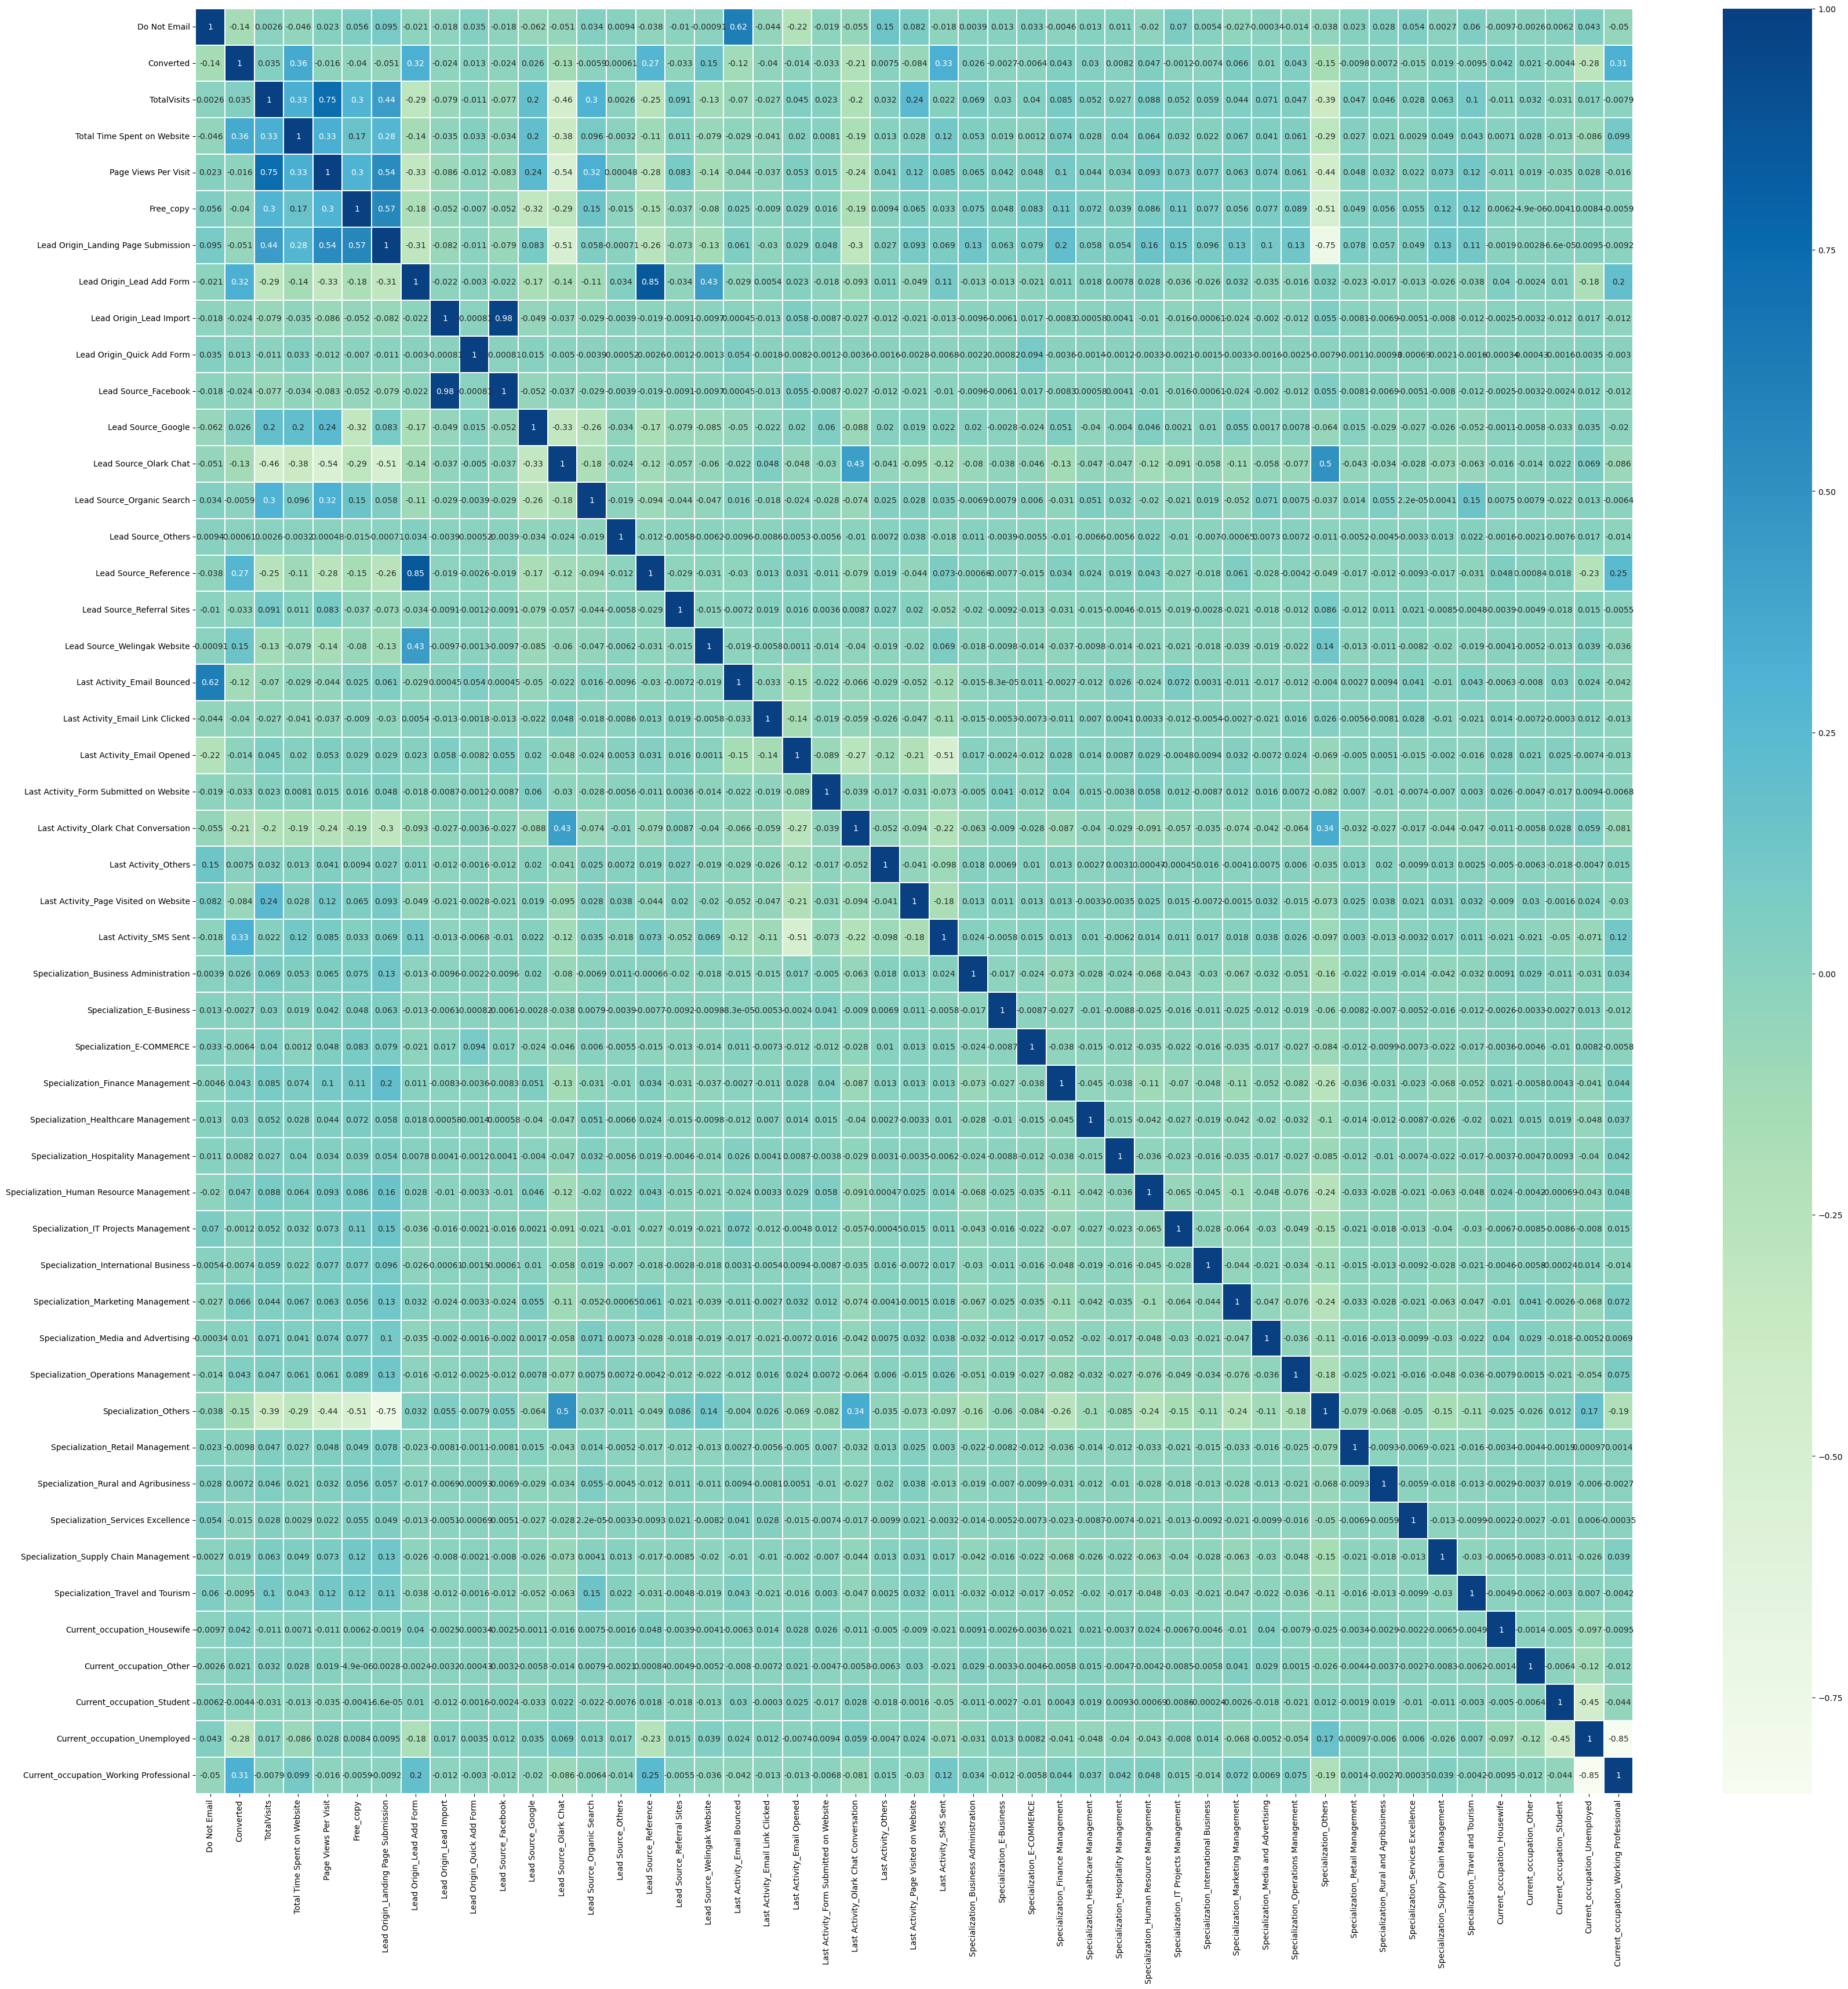

In [74]:
#correlation matrix
plt.figure(figsize = (40, 40))        
sns.heatmap(df.corr(), linewidths=0.01, cmap="GnBu", annot=True)
plt.show()

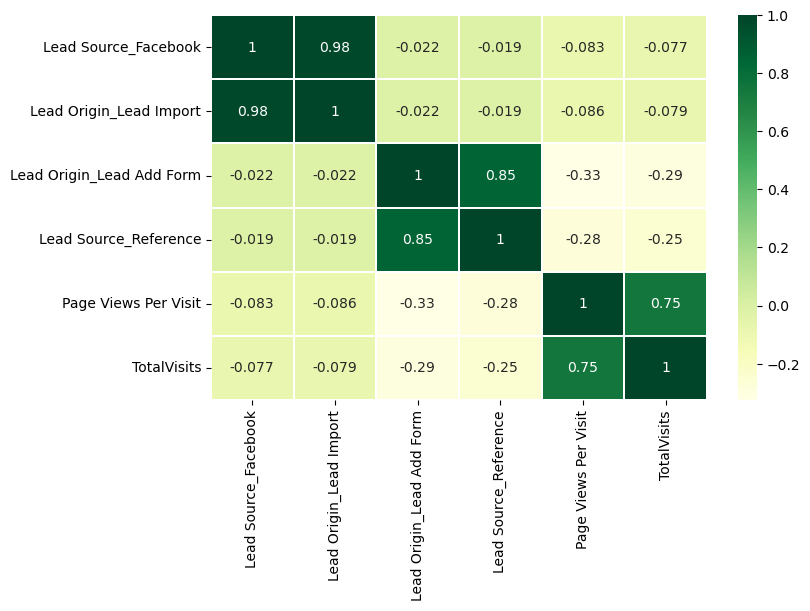

In [75]:
#analysing variables which might be highly correlated with each other from same class 
plt.figure(figsize = (8,5))        
sns.heatmap(df[['Lead Source_Facebook','Lead Origin_Lead Import','Lead Origin_Lead Add Form', 'Lead Source_Reference',
                       'Page Views Per Visit', 'TotalVisits']].corr(), linewidths=0.01, cmap="YlGn", annot=True)
plt.show()

'Lead Origin_Lead Import' and 'Lead Origin_Lead Add Form' show strong correlation with 'Lead Source_Facebook' (0.98) and 'Lead Source_Reference' (0.85) respectively. Dropping one from each pair may not substantially affect the overall model performance.

In [76]:
X_test = X_test.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],axis=1)

X_train = X_train.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],axis=1)

In [77]:
X_test.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
4269             0          8.0                         1011   
2376             0          0.0                            0   
7766             0          5.0                           59   
9199             0          0.0                            0   
4359             0          0.0                            0   

      Page Views Per Visit  Free_copy  Lead Origin_Landing Page Submission  \
4269                   7.5          0                                    0   
2376                   0.0          0                                    0   
7766                   5.0          0                                    0   
9199                   0.0          0                                    0   
4359                   0.0          0                                    0   

      Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  \
4269                           0                     0                   0   
2376                           0                     0                   0   
7766                           0                     0                   1   
9199                           0                     0                   0   
4359                           0                     0                   0   

      Lead Source_Olark Chat  ...  Specialization_Retail Management  \
4269                       0  ...                                 0   
2376                       0  ...                                 0   
7766                       0  ...                                 0   
9199                       1  ...                                 0   
4359                       0  ...                                 0   

      Specialization_Rural and Agribusiness  \
4269                                      0   
2376                                      0   
7766                                      0   
9199                                      0   
4359                                      0   

      Specialization_Services Excellence  \
4269                                   0   
2376                                   0   
7766                                   0   
9199                                   0   
4359                                   0   

      Specialization_Supply Chain Management  \
4269                                       0   
2376                                       0   
7766                                       1   
9199                                       0   
4359                                       0   

      Specialization_Travel and Tourism  Current_occupation_Housewife  \
4269                                  0                             0   
2376                                  0                             0   
7766                                  0                             0   
9199                                  0                             0   
4359                                  0                             0   

      Current_occupation_Other  Current_occupation_Student  \
4269                         0                           0   
2376                         0                           0   
7766                         0                           0   
9199                         0                           0   
4359                         0                           0   

      Current_occupation_Unemployed  Current_occupation_Working Professional  
4269                              1                                        0  
2376                              1                                        0  
7766                              0                                        1  
9199                              1                                        0  
4359                              1                                        0  

[5 rows x 46 columns]

# 7. Building model

In [78]:
logreg = LogisticRegression()

# running RFE with 15 variables as output
rfe = RFE(logreg, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 11),
 ('TotalVisits', False, 9),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('Free_copy', False, 18),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Quick Add Form', False, 19),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 22),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 28),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 24),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 14),
 ('Last Activity_Email Link Clicked', False, 6),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 29),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 12),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 

In [79]:
# Check the top 15 features chosen by RFE

RFETable=pd.DataFrame()
RFETable['Variable Name']=X_train.columns
RFETable['Variable Chosen'] = rfe.support_
RFETable['Ranking']=rfe.ranking_
RFETable.sort_values(by='Ranking')

Variable Name  Variable Chosen  Ranking
22                    Last Activity_SMS Sent             True        1
41              Current_occupation_Housewife             True        1
35                     Specialization_Others             True        1
28     Specialization_Hospitality Management             True        1
20                      Last Activity_Others             True        1
19     Last Activity_Olark Chat Conversation             True        1
17                Last Activity_Email Opened             True        1
14              Lead Source_Welingak Website             True        1
12                     Lead Source_Reference             True        1
11                        Lead Source_Others             True        1
45   Current_occupation_Working Professional             True        1
9                     Lead Source_Olark Chat             True        1
7                       Lead Source_Facebook             True        1
5        Lead Origin_Landing Page Submission             True        1
2                Total Time Spent on Website             True        1
44             Current_occupation_Unemployed            False        2
42                  Current_occupation_Other            False        3
43                Current_occupation_Student            False        4
37     Specialization_Rural and Agribusiness            False        5
16          Last Activity_Email Link Clicked            False        6
31     Specialization_International Business            False        7
36          Specialization_Retail Management            False        8
1                                TotalVisits            False        9
3                       Page Views Per Visit            False       10
0                               Do Not Email            False       11
21     Last Activity_Page Visited on Website            False       12
23    Specialization_Business Administration            False       13
15               Last Activity_Email Bounced            False       14
34      Specialization_Operations Management            False       15
29  Specialization_Human Resource Management            False       16
32       Specialization_Marketing Management            False       17
4                                  Free_copy            False       18
6                 Lead Origin_Quick Add Form            False       19
38        Specialization_Services Excellence            False       20
39    Specialization_Supply Chain Management            False       21
8                         Lead Source_Google            False       22
25                 Specialization_E-COMMERCE            False       23
13                Lead Source_Referral Sites            False       24
30     Specialization_IT Projects Management            False       25
27      Specialization_Healthcare Management            False       26
26         Specialization_Finance Management            False       27
10                Lead Source_Organic Search            False       28
18   Last Activity_Form Submitted on Website            False       29
33      Specialization_Media and Advertising            False       30
24                 Specialization_E-Business            False       31
40         Specialization_Travel and Tourism            False       32

### Logistic Regression model - 1

In [80]:
# Columns which are selected by RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Facebook', 'Lead Source_Olark Chat', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'Current_occupation_Housewife',
       'Current_occupation_Working Professional'],
      dtype='object')

In [81]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm1 = sm.add_constant(X_train_rfe)

# Create a fitted model
LRMod1 = sm.GLM(y_train,X_train_sm1,family = sm.families.Binomial()).fit()

# Summary of logistic regression model
LRMod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2732.8
Date:                Wed, 10 Jan 2024   Deviance:                       5465.5
Time:                        22:23:35   Pearson chi2:                 8.09e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3839
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.0333      0.144     -7.155      0.000      -1.316      -0.750
Total Time Spent on Website                 1.0505      0.039     27.169      0.000       0.975       1.126
Lead Origin_Landing Page Submission        -1.2721      0.126    -10.059      0.000      -1.520      -1.024
Lead Source_Facebook                       -0.6961      0.529     -1.316      0.188      -1.733       0.340
Lead Source_Olark Chat                      0.9001      0.119      7.585      0.000       0.668       1.133
Lead Source_Others                          0.9807      0.512      1.915      0.056      -0.023       1.985
Lead Source_Reference                       2.8977      0.216     13.434      0.000       2.475       3.320
Lead Source_Welingak Website                5.3802      0.729      7.384      0.000       3.952       6.808
Last Activity_Email Opened                  0.9506      0.105      9.061      0.000       0.745       1.156
Last Activity_Olark Chat Conversation      -0.5534      0.187     -2.956      0.003      -0.920      -0.186
Last Activity_Others                        1.2580      0.238      5.276      0.000       0.791       1.725
Last Activity_SMS Sent                      2.0688      0.108     19.188      0.000       1.857       2.280
Specialization_Hospitality Management      -1.0720      0.324     -3.310      0.001      -1.707      -0.437
Specialization_Others                      -1.1937      0.121     -9.841      0.000      -1.431      -0.956
Current_occupation_Housewife               23.0222   1.33e+04      0.002      0.999    -2.6e+04     2.6e+04
Current_occupation_Working Professional     2.6855      0.190     14.104      0.000       2.312       3.059
===========================================================================================================
"""

Removing 'Current_Occupation_Housewife' column from the model as it has higher p-value (0.99) than accepted threshold of 0.05 for statistical significance.

In [82]:
# Dropping 'Current_Occupation_Housewife' column
rfe_col=rfe_col.drop('Current_occupation_Housewife')
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Facebook', 'Lead Source_Olark Chat', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'Current_occupation_Working Professional'],
      dtype='object')

### Logistic Regression Model - 2

In [83]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm2 = sm.add_constant(X_train_rfe)

# Create a fitted model
LRMod2 = sm.GLM(y_train,X_train_sm2,family = sm.families.Binomial()).fit()

# Summary of logistic regression model
LRMod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2740.3
Date:                Wed, 10 Jan 2024   Deviance:                       5480.7
Time:                        22:23:35   Pearson chi2:                 8.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3825
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.0251      0.144     -7.111      0.000      -1.308      -0.743
Total Time Spent on Website                 1.0494      0.039     27.177      0.000       0.974       1.125
Lead Origin_Landing Page Submission        -1.2674      0.126    -10.030      0.000      -1.515      -1.020
Lead Source_Facebook                       -0.6969      0.529     -1.318      0.187      -1.733       0.339
Lead Source_Olark Chat                      0.8991      0.119      7.580      0.000       0.667       1.132
Lead Source_Others                          0.9739      0.512      1.902      0.057      -0.030       1.977
Lead Source_Reference                       2.9171      0.215     13.538      0.000       2.495       3.339
Lead Source_Welingak Website                5.3791      0.729      7.384      0.000       3.951       6.807
Last Activity_Email Opened                  0.9490      0.105      9.077      0.000       0.744       1.154
Last Activity_Olark Chat Conversation      -0.5583      0.187     -2.985      0.003      -0.925      -0.192
Last Activity_Others                        1.2482      0.238      5.238      0.000       0.781       1.715
Last Activity_SMS Sent                      2.0588      0.108     19.151      0.000       1.848       2.270
Specialization_Hospitality Management      -1.0795      0.324     -3.334      0.001      -1.714      -0.445
Specialization_Others                      -1.1978      0.121     -9.881      0.000      -1.435      -0.960
Current_occupation_Working Professional     2.6773      0.190     14.068      0.000       2.304       3.050
===========================================================================================================
"""

Removing 'Lead Source_Facebook' column from the model as it has higher p-value (0.187) than accepted threshold of 0.05 for statistical significance.

In [84]:
# Dropping 'Lead Source_Facebook' column
rfe_col=rfe_col.drop('Lead Source_Facebook')
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Olark Chat', 'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Hospitality Management',
       'Specialization_Others', 'Current_occupation_Working Professional'],
      dtype='object')

### Logistic Regression Model - 2

In [85]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm3 = sm.add_constant(X_train_rfe)

# Create a fitted model
LRMod3 = sm.GLM(y_train,X_train_sm3,family = sm.families.Binomial()).fit()

# Summary of logistic regression model
LRMod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2741.3
Date:                Wed, 10 Jan 2024   Deviance:                       5482.6
Time:                        22:23:35   Pearson chi2:                 8.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3823
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.0405      0.144     -7.245      0.000      -1.322      -0.759
Total Time Spent on Website                 1.0518      0.039     27.262      0.000       0.976       1.127
Lead Origin_Landing Page Submission        -1.2493      0.125     -9.958      0.000      -1.495      -1.003
Lead Source_Olark Chat                      0.9169      0.118      7.773      0.000       0.686       1.148
Lead Source_Others                          0.9814      0.512      1.917      0.055      -0.022       1.985
Lead Source_Reference                       2.9372      0.215     13.661      0.000       2.516       3.359
Lead Source_Welingak Website                5.3967      0.728      7.409      0.000       3.969       6.824
Last Activity_Email Opened                  0.9434      0.105      9.028      0.000       0.739       1.148
Last Activity_Olark Chat Conversation      -0.5582      0.187     -2.984      0.003      -0.925      -0.192
Last Activity_Others                        1.2487      0.238      5.239      0.000       0.782       1.716
Last Activity_SMS Sent                      2.0555      0.107     19.124      0.000       1.845       2.266
Specialization_Hospitality Management      -1.0904      0.323     -3.377      0.001      -1.723      -0.458
Specialization_Others                      -1.1943      0.121     -9.873      0.000      -1.431      -0.957
Current_occupation_Working Professional     2.6757      0.190     14.063      0.000       2.303       3.049
===========================================================================================================
"""

Removing 'Lead Source_Others' column from the model as it has higher p-value (0.055) than accepted threshold of 0.05 for statistical significance.

In [86]:
# Dropping 'Lead Source_Others' column
rfe_col=rfe_col.drop('Lead Source_Others')
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Hospitality Management',
       'Specialization_Others', 'Current_occupation_Working Professional'],
      dtype='object')

### Logistic Regression Model - 4

In [87]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm4 = sm.add_constant(X_train_rfe)

# Create a fitted model
LRMod4 = sm.GLM(y_train,X_train_sm4, family = sm.families.Binomial()).fit()

# Summary of logistic regression model
LRMod4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2743.1
Date:                Wed, 10 Jan 2024   Deviance:                       5486.1
Time:                        22:23:35   Pearson chi2:                 8.11e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3819
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.0236      0.143     -7.145      0.000      -1.304      -0.743
Total Time Spent on Website                 1.0498      0.039     27.234      0.000       0.974       1.125
Lead Origin_Landing Page Submission        -1.2590      0.125    -10.037      0.000      -1.505      -1.013
Lead Source_Olark Chat                      0.9072      0.118      7.701      0.000       0.676       1.138
Lead Source_Reference                       2.9253      0.215     13.615      0.000       2.504       3.346
Lead Source_Welingak Website                5.3887      0.728      7.399      0.000       3.961       6.816
Last Activity_Email Opened                  0.9421      0.104      9.022      0.000       0.737       1.147
Last Activity_Olark Chat Conversation      -0.5556      0.187     -2.974      0.003      -0.922      -0.189
Last Activity_Others                        1.2531      0.238      5.259      0.000       0.786       1.720
Last Activity_SMS Sent                      2.0519      0.107     19.106      0.000       1.841       2.262
Specialization_Hospitality Management      -1.0944      0.323     -3.391      0.001      -1.727      -0.462
Specialization_Others                      -1.2033      0.121     -9.950      0.000      -1.440      -0.966
Current_occupation_Working Professional     2.6697      0.190     14.034      0.000       2.297       3.042
===========================================================================================================
"""

The Logistic Regression Model - 4 is stable and all the p-values are within the acceptable threshold (p-values < 0.05), thus making it suitable for further analysis.

In [88]:
#calculating VIFs for variables

def VIFCalculate(modelDF):
    vif = pd.DataFrame()
    vif['Features'] = modelDF.columns
    vif['VIF'] = [variance_inflation_factor(modelDF.values, i) for i in range(modelDF.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending=False)
    vif = vif.reset_index(drop=True)
    return vif

# Now checking VIFs for all variables in the Logistic Regression Model - 4
VIFCalculate(X_train_rfe)

Features   VIF
0                     Specialization_Others  2.47
1       Lead Origin_Landing Page Submission  2.45
2                Last Activity_Email Opened  2.36
3                    Last Activity_SMS Sent  2.20
4                    Lead Source_Olark Chat  2.14
5     Last Activity_Olark Chat Conversation  1.72
6                     Lead Source_Reference  1.31
7               Total Time Spent on Website  1.24
8   Current_occupation_Working Professional  1.21
9              Lead Source_Welingak Website  1.08
10                     Last Activity_Others  1.08
11    Specialization_Hospitality Management  1.02


All variables in the logistic regression model (LRMod4) show low multicollinearity (VIF < 5) and are statistically significant (p < 0.05). Consequently, LRMod4 is chosen as the final model for predictions, with no consideration for alternative models. This selection is based on acceptable VIF and p-values, adhering to standard logistic regression modeling practices.

# 8. Model Evaluation

In [89]:
# Getting the predicted values on the train set

y_train_pred = LRMod4.predict(X_train_sm4).values.reshape(-1)
y_train_pred[:10]

array([0.47408215, 0.07325161, 0.24908697, 0.7689732 , 0.2129729 ,
       0.9878074 , 0.1084541 , 0.99612765, 0.16925902, 0.86964073])

In [90]:
# Creating a data frame with the actual Converted score and Probability of conversion

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID
0          0        0.474082         1871
1          0        0.073252         6795
2          0        0.249087         3516
3          0        0.768973         8105
4          0        0.212973         3934

In [91]:
# Mapping the prediction conversion Rate according to the probability cut off.

y_train_pred_final['Predicted'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted
0          0        0.474082         1871          0
1          0        0.073252         6795          0
2          0        0.249087         3516          0
3          0        0.768973         8105          1
4          0        0.212973         3934          0

In [92]:
# UDF for Confusion Matrix
def Con_Mat_Func(confusion_matrix):
    TP = confusion_matrix[1,1] # true positive
    TN = confusion_matrix[0,0] # true negatives
    FP = confusion_matrix[0,1] # false positives
    FN = confusion_matrix[1,0] # false negatives
    
    acc = round((TN+TP) / float(TN+TP+FN+FP), 4)
    sens = round(TP / float(TP+FN), 4)
    spec = round(TN / float(TN+FP), 4)
    fprate = round(FP/ float(TN+FP), 4)
    prec = round(TP / float(TP+FP), 4)
    recal = round(TP / float(TP+FN), 4)
    npval = round(TN / float(TN+ FN), 4)
    
    print('Accuracy                  =', acc)
    print('Sensitivity               =', sens)
    print('Specificity               =', spec)
    print('False Positive Rate       =', fprate)
    print('Precision                 =', prec)
    print('Recall                    =', recal)
    print('Negative Predictive Value =', npval)

In [93]:
# Confusion matrix (Actual / Predicted)

confusion1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print(confusion1)

[[3588  414]
 [ 846 1620]]


In [94]:
# Actual/Predicted      not_converted      converted  
# not_converted             3588              414
# converted                  846             1620

In [95]:
Con_Mat_Func(confusion1)

Accuracy                  = 0.8052
Sensitivity               = 0.6569
Specificity               = 0.8966
False Positive Rate       = 0.1034
Precision                 = 0.7965
Recall                    = 0.6569
Negative Predictive Value = 0.8092


In [96]:
#Plotting the ROC Curve
# UDF to draw ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

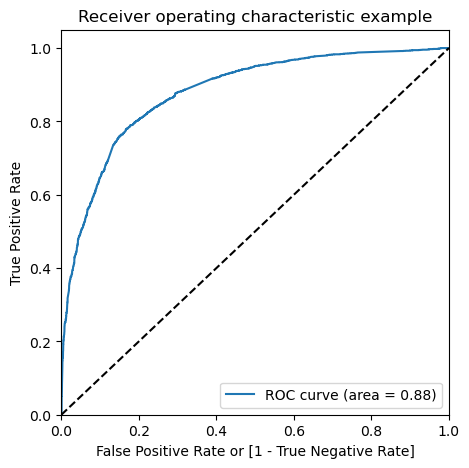

In [97]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'],
                                         drop_intermediate = False )
draw_roc(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

### Finding optimal cutoff point

In [98]:
#create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
    
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.474082         1871          0    1    1    1    1    1   
1          0        0.073252         6795          0    1    0    0    0    0   
2          0        0.249087         3516          0    1    1    1    0    0   
3          0        0.768973         8105          1    1    1    1    1    1   
4          0        0.212973         3934          0    1    1    1    0    0   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    1    1    1    0    0  
4    0    0    0    0    0

In [99]:
#Calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i , accuracy, sensi, speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.595702  0.973642  0.362819
0.2   0.2  0.721243  0.920114  0.598701
0.3   0.3  0.791280  0.832928  0.765617
0.4   0.4  0.813698  0.763585  0.844578
0.5   0.5  0.805195  0.656934  0.896552
0.6   0.6  0.792981  0.585969  0.920540
0.7   0.7  0.779066  0.507705  0.946277
0.8   0.8  0.754020  0.405515  0.968766
0.9   0.9  0.707792  0.247364  0.991504


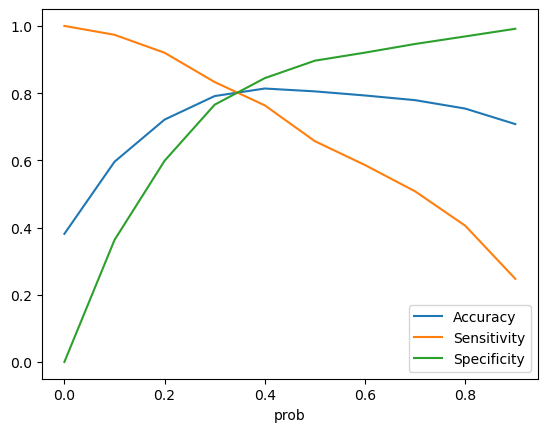

In [100]:
#plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

plt.legend(labels=['Accuracy','Sensitivity','Specificity'])

plt.show()

The curve analysis suggests an optimal classification cutoff probability of approximately 0.35.

In [101]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"],axis = 1, inplace = True) 
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  final_predicted
0          0        0.474082         1871                1
1          0        0.073252         6795                0
2          0        0.249087         3516                0
3          0        0.768973         8105                1
4          0        0.212973         3934                0

### Using confusion matrix for Train to calculate all metrics

In [102]:
confusion2 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final.final_predicted )
print(confusion2)

[[3245  757]
 [ 500 1966]]


In [103]:
# Actual/Predicted      not_converted      converted  
# not_converted             3064              938
# converted  

In [104]:
Con_Mat_Func(confusion2)

Accuracy                  = 0.8057
Sensitivity               = 0.7972
Specificity               = 0.8108
False Positive Rate       = 0.1892
Precision                 = 0.722
Recall                    = 0.7972
Negative Predictive Value = 0.8665


### Precision and Recall

In [105]:
# Creating precision-recall tradeoff curve
y_train_pred_final['Converted'], y_train_pred_final['final_predicted']
preci, recal, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

In [106]:
p_score = round(precision_score(y_train_pred_final['Converted'], y_train_pred_final['final_predicted']), 4)
r_score = round(recall_score(y_train_pred_final['Converted'], y_train_pred_final['final_predicted']), 4)

print('Precision score =', p_score)
print('Recall score    =', r_score)

Precision score = 0.722
Recall score    = 0.7972


In [107]:
# Creating precision-recall tradeoff curve
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

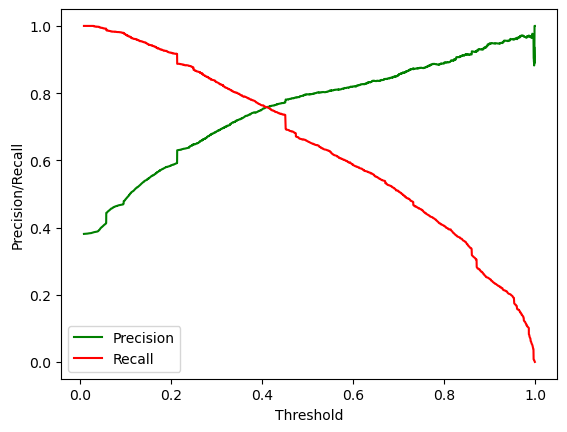

In [108]:
# plot precision-recall tradeoff curve
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")

# add legend and axis labels

plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show()


The precision-recall curve indicates that a threshold of 0.4 offers a balanced trade-off between precision and recall.

# 9. Making predictions on the test set

In [109]:
NumVarCols=X_test.select_dtypes(include=['int64','float64']).columns

X_test[NumVarCols] = scaler.transform(X_test[NumVarCols])

X_test = X_test[rfe_col]
X_test.head()

Total Time Spent on Website  Lead Origin_Landing Page Submission  \
4269                     0.964504                                    0   
2376                    -0.885371                                    0   
7766                    -0.777416                                    0   
9199                    -0.885371                                    0   
4359                    -0.885371                                    0   

      Lead Source_Olark Chat  Lead Source_Reference  \
4269                       0                      0   
2376                       0                      1   
7766                       0                      0   
9199                       1                      0   
4359                       0                      1   

      Lead Source_Welingak Website  Last Activity_Email Opened  \
4269                             0                           0   
2376                             0                           0   
7766                             0                           0   
9199                             0                           0   
4359                             0                           1   

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
4269                                      0                     0   
2376                                      0                     0   
7766                                      0                     1   
9199                                      1                     0   
4359                                      0                     0   

      Last Activity_SMS Sent  Specialization_Hospitality Management  \
4269                       1                                      0   
2376                       1                                      0   
7766                       0                                      0   
9199                       0                                      0   
4359                       0                                      0   

      Specialization_Others  Current_occupation_Working Professional  
4269                      1                                        0  
2376                      1                                        0  
7766                      0                                        1  
9199                      1                                        0  
4359                      0                                        0

In [110]:
# Adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

# Making prediction using Logistic Regression Model - 4
y_test_pred = LRMod4.predict(X_test_sm)

# Top 10 columns
y_test_pred[:10]

4269    0.697934
2376    0.860665
7766    0.889241
9199    0.057065
4359    0.871510
9186    0.503859
1631    0.419681
8963    0.154531
8007    0.072344
5324    0.298849
dtype: float64

In [111]:
# Changing to dataframe of predicted probability
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

0
4269  0.697934
2376  0.860665
7766  0.889241
9199  0.057065
4359  0.871510

In [112]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

Converted
4269          1
2376          1
7766          1
9199          0
4359          1

In [113]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

Converted  Prospect ID         0
0          1         4269  0.697934
1          1         2376  0.860665
2          1         7766  0.889241
3          0         9199  0.057065
4          1         4359  0.871510

In [114]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

y_pred_final.head()

Prospect ID  Converted  Converted_Prob
0         4269          1        0.697934
1         2376          1        0.860665
2         7766          1        0.889241
3         9199          0        0.057065
4         4359          1        0.871510

In [115]:
# Taking sensitivity-specificity method at 0.35 probability cutoff during training
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted
0         4269          1        0.697934                1
1         2376          1        0.860665                1
2         7766          1        0.889241                1
3         9199          0        0.057065                0
4         4359          1        0.871510                1

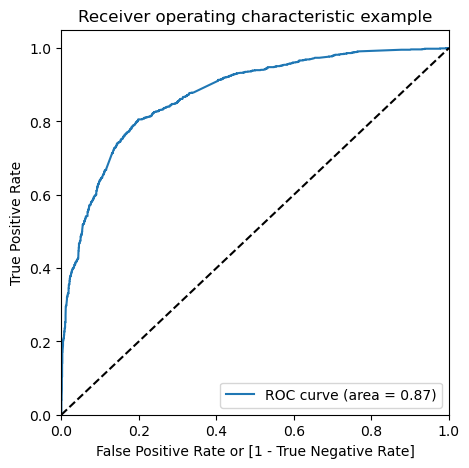

In [116]:
#ROC curve for Test Set
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"], drop_intermediate = False )

draw_roc(y_pred_final["Converted"], y_pred_final["Converted_Prob"])

In [117]:
confusion_test = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])
print(confusion_test)

[[1359  318]
 [ 227  868]]


In [118]:
# Actual/Predicted      not_converted      converted  
# not_converted             1359              318
# converted                  227              868

In [119]:
Con_Mat_Func(confusion_test)

Accuracy                  = 0.8034
Sensitivity               = 0.7927
Specificity               = 0.8104
False Positive Rate       = 0.1896
Precision                 = 0.7319
Recall                    = 0.7927
Negative Predictive Value = 0.8569


In [120]:
#Adding Lead Score to Test dataframe
y_pred_final['Lead_Score'] = y_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_pred_final.head(10)

Prospect ID  Converted  Converted_Prob  final_predicted  Lead_Score
0         4269          1        0.697934                1          70
1         2376          1        0.860665                1          86
2         7766          1        0.889241                1          89
3         9199          0        0.057065                0           6
4         4359          1        0.871510                1          87
5         9186          1        0.503859                1          50
6         1631          1        0.419681                1          42
7         8963          1        0.154531                0          15
8         8007          0        0.072344                0           7
9         5324          1        0.298849                0          30

In [121]:
y_pred_final.sort_values(by='Lead_Score', ascending=False)

Prospect ID  Converted  Converted_Prob  final_predicted  Lead_Score
1026         5671          1        0.998942                1         100
1239         2489          1        0.996164                1         100
1976         4775          1        0.996645                1         100
196          5793          1        0.996645                1         100
416          2804          1        0.996645                1         100
...           ...        ...             ...              ...         ...
104           155          0        0.013285                0           1
2712         2577          0        0.014743                0           1
1136         4098          0        0.014996                0           1
597          3682          0        0.013772                0           1
1029         5993          0        0.014088                0           1

[2772 rows x 5 columns]

The customers with a high lead score have a higher chance of conversion and low lead score have a lower chance of conversion.

# CONCLUSION

#### Train Data Set:
- Accuracy: 80.57%
- Sensitivity: 79.72%
- Specificity: 81.08%

#### Test Data Set:
- Accuracy: 80.34%
- Sensitivity: 79.27%
- Specificity: 81.04%

**The model's evaluation metrics consistently exhibit close values between the test and train datasets, suggesting its reliability and lack of overfitting. This uniform performance across metrics indicates effective generalization to new data and implies unbiased predictions, instilling confidence in the model's accuracy for future predictions.**

#### Equation:
ln(odds) = - 1.0236 x const + 1.0498 x Total Time Spent on Website - 1.259 x Lead Origin_Landing Page Submission + 0.9072 x Lead Source_Olark Chat + 2.9253 x Lead Source_Reference + 5.3887 x Lead Source_Welingak Website + 0.9421 x Last Activity_Email Opened -0.5556 x Last Activity_Olark Chat Conversation + 1.2531 x Last Activity_Others + 2.0519 x Last Activity_SMS Sent - 1.0944 x Specialization_Hospitality Management - 1.2033 x Specialization_Others + 2.6697 x Current_Occupation_Working Professional


- Effective factors contributing to a high conversion rate include 'Lead Source_Welingak Website', 'Current_Occupation_Working Professional', and 'Lead Source_Reference'.
- Targeting working professionals is recommended due to their high conversion rates and potentially better financial situations.
- Referral leads from existing customers show significantly higher conversion rates.
- Google and Direct Traffic channels exhibit promising conversion rates.
- Leads with 'Last Activity' as ‘SMS Sent’ or ‘Email Opened’ tend to have higher conversion rates.
- The most common specialization category among customers is 'Others', followed by Finance Management, HR Management, and Marketing Management.

## Recommendations
- Features like 'Lead Source_Welingak Website', 'Current_Occupation_Working Professional', and 'Lead Source_Reference' show a high conversion rate, emphasizing their importance in lead generation efforts.
- Targeting working professionals can be fruitful, considering their higher conversion probability and likely better financial situations.
- Encouraging referrals from existing customers, who exhibit a significantly higher conversion rate, can be incentivized for more successful lead generation.
- Increasing media usage, such as Google ads or email campaigns, can save time and enhance conversion rates.
- Leads with 'Last Activity' as ‘SMS Sent’ or ‘Email Opened’ should be targeted more actively due to their higher conversion rates.
- Analyzing customer behavior with extended website time can improve user experience and boost conversion rates. Focus on creating engaging content and user-friendly navigation.
- Understanding popular specializations like Marketing Management and HR Management helps tailor courses and marketing campaigns, attracting and retaining customers in those fields.